In [1]:
import numpy as np 
print(np.__version__)
import math
from pathlib import Path
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
import coronagraph as cg
from astropy.io import ascii 
import os, glob
from astropy.table import Table
import matplotlib.font_manager as font_manager


# Converting .rad files to 2D array and assigning columns from mixed files to 2D array
def reflectance(data,isRadfile):
    columnone=[]
    columnfour=[]
    columnthree=[]
    if isRadfile:
        for i in range (0,len(data)):
            columnone.append(float(data[i][0]))
            columnfour.append(float(data[i][3]))
            columnthree.append(float(data[i][2]))
        o=np.array(columnone)
        f=np.array(columnfour)
        t=np.array(columnthree)
    
        reflectance=f/t
        wavelength=o
    else:
        for i in range (0,len(data)):
            columnone.append(float(data[i][0]))
            columnthree.append(float(data[i][2]))
        o=np.array(columnone)
        t=np.array(columnthree)
        
        reflectance=t
        wavelength=o
    
    
    return np.array([wavelength,reflectance])


os.chdir('/Users/schuylerraeschroerborges/Desktop/Second_Project/')

black=ascii.read("bestblackmat.txt", data_start=1, delimiter='\s')
orange=ascii.read("bestorangemat.txt", data_start=1, delimiter='\s')
wavelength=black['Wavelength']*10**(-3)

1.21.6


In [2]:
""""Loading all data into dictionaries"""

# Read in all files to dictionary (as astropy table)
spectra = dict()
files = os.listdir('.')

for file in files:
    if file.startswith('Arthro'):
        spectra[file] = ascii.read(file, data_start=0,  delimiter='\s')
    elif file.startswith('Ecto'):
        spectra[file] = ascii.read(file, data_start=0,  delimiter='\s')
    elif file.startswith('black'):
        spectra[file] = ascii.read(file, data_start=0,  delimiter='\s')
    elif file.startswith('orangemat'):
        spectra[file] = ascii.read(file, data_start=0,  delimiter='\s')
    else:
        pass

    
# Split into txt and rad files
mixedtxt = dict()
surfacetxt = dict()
clearrad = dict()
for key in spectra.keys():
    if 'mixed' in key:
        mixedtxt[key] = spectra[key]
    elif '.txt' in key:
        surfacetxt[key] = spectra [key]
    elif '.rad' and 'clear' in key:
        clearrad[key] = spectra[key]
    else:
        pass

print(mixedtxt.keys())
print(surfacetxt.keys())
print(clearrad.keys())

dict_keys(['Arthro_mixed50.txt', 'orangemat_mixed25_scrubbed.txt', 'Ectoth_mixed25.txt', 'orangemat_mixed50.txt', 'Ectoth_mixed25_scrubbed.txt', 'Arthro_mixed25_scrubbed.txt', 'blackmat_mixed25.txt', 'blackmat_mixed50_wrong.txt', 'Ectoth_mixed50.txt', 'Arthro_new_mixed50_scrubbed.txt', 'Arthro_mixed25.txt', 'blackmat_mixed25_scrubbed.txt', 'blackmat_mixed50.txt', 'Arthro_new_mixed75_scrubbed.txt', 'orangemat_mixed25.txt', 'blackmat_mixed50_scrubbed_wrong.txt', 'blackmat_mixed75.txt', 'blackmat_mixed75_wrong.txt', 'blackmat_mixed75_scrubbed.txt', 'Arthro_new_mixed25_scrubbed.txt', 'blackmat_mixed25_wrong.txt', 'blackmat_mixed50_scrubbed.txt', 'Ectoth_mixed75.txt', 'Ectoth_mixed75_scrubbed.txt', 'orangemat_mixed50_scrubbed.txt', 'Arthro_mixed75_scrubbed.txt', 'blackmat_mixed75_scrubbed_wrong.txt', 'orangemat_mixed75.txt', 'Ectoth_mixed50_scrubbed.txt', 'orangemat_mixed75_scrubbed.txt', 'blackmat_mixed25_scrubbed_wrong.txt', 'Arthro_mixed50_scrubbed.txt', 'Arthro_mixed75.txt'])
dict_keys(

In [3]:
for file in mixedtxt:
    mixedtxt[file] = reflectance(mixedtxt[file],False)
    
for file in clearrad:
    clearrad[file] = reflectance(clearrad[file],True)
    
# Downsampling to low resolution SMART spectra
def downspec(ref, lam):
    # Set the wavelength and resolution parameters
    lammin = 0.4
    lammax = 1.030
    R = 140
    #dl = 0.01

    # Construct new low-res wavelength grid
    wl, dwl = cg.noise_routines.construct_lam(lammin, lammax, R)

    # Down-bin flux to low-res
    flr = cg.downbin_spec(ref, lam, wl, dlam=dwl)
    
    return np.array([wl, flr], dtype=float)

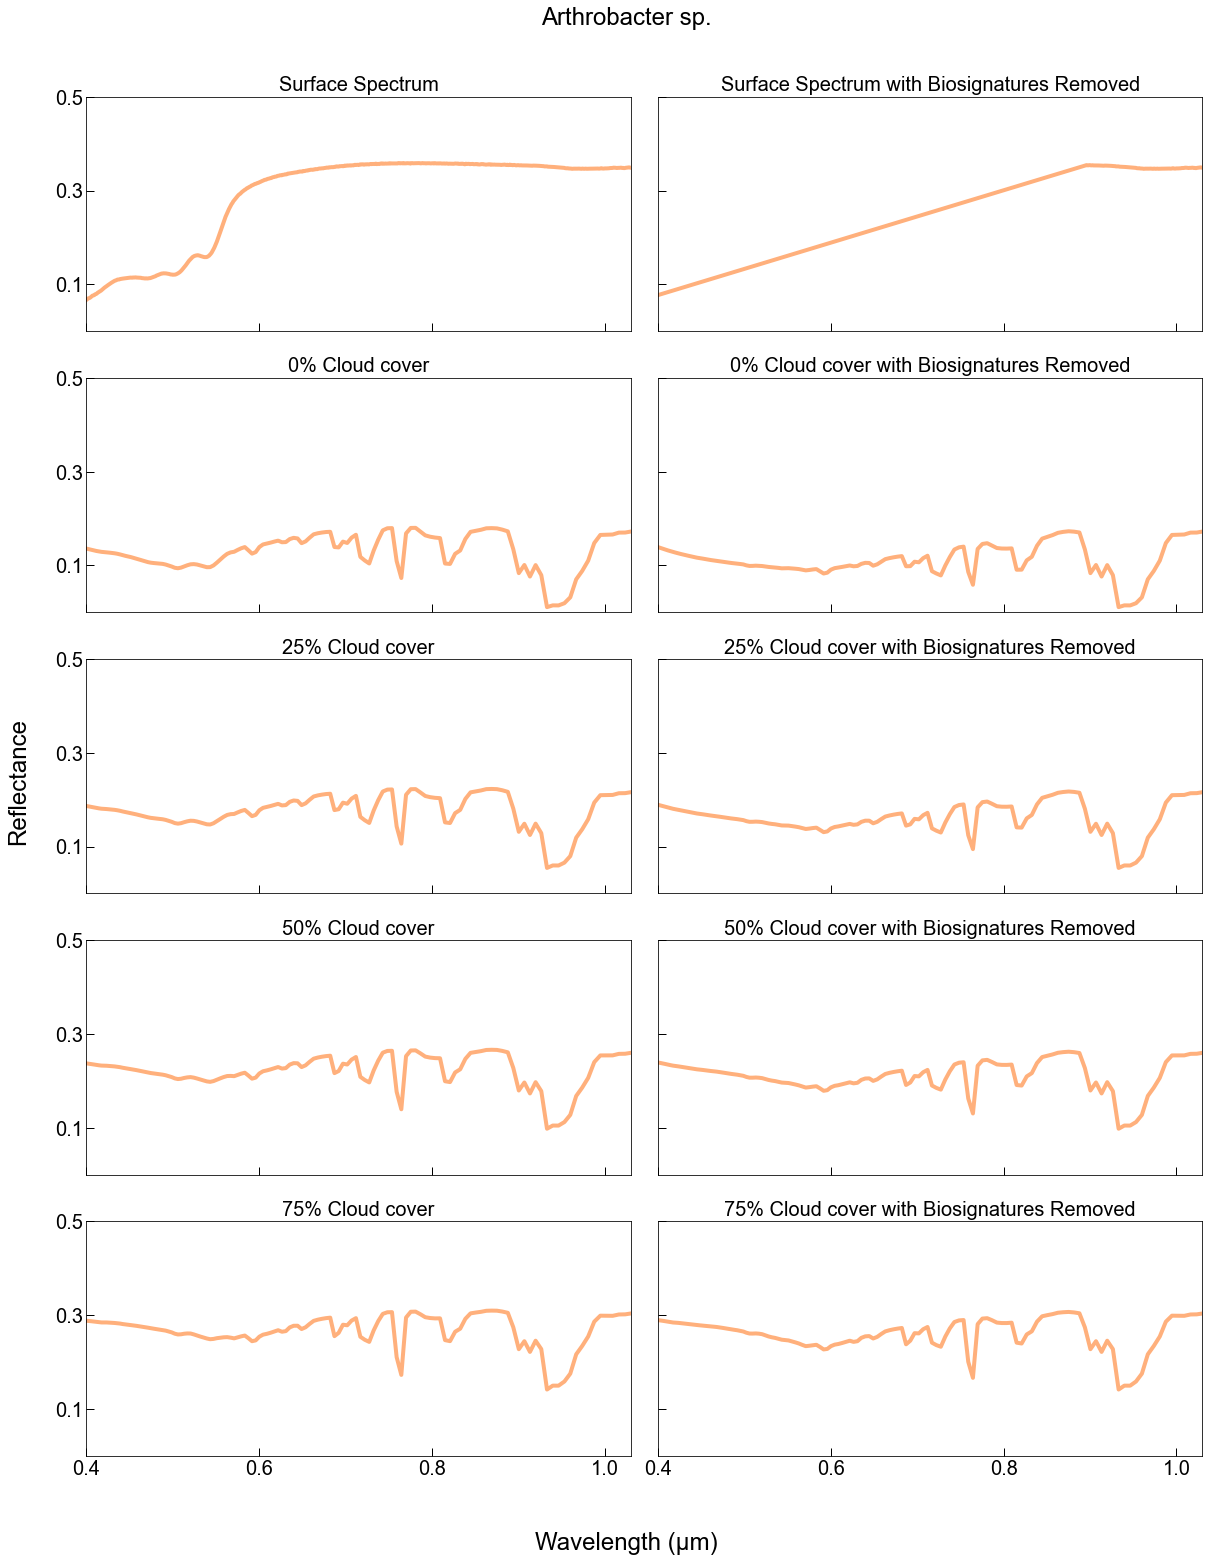

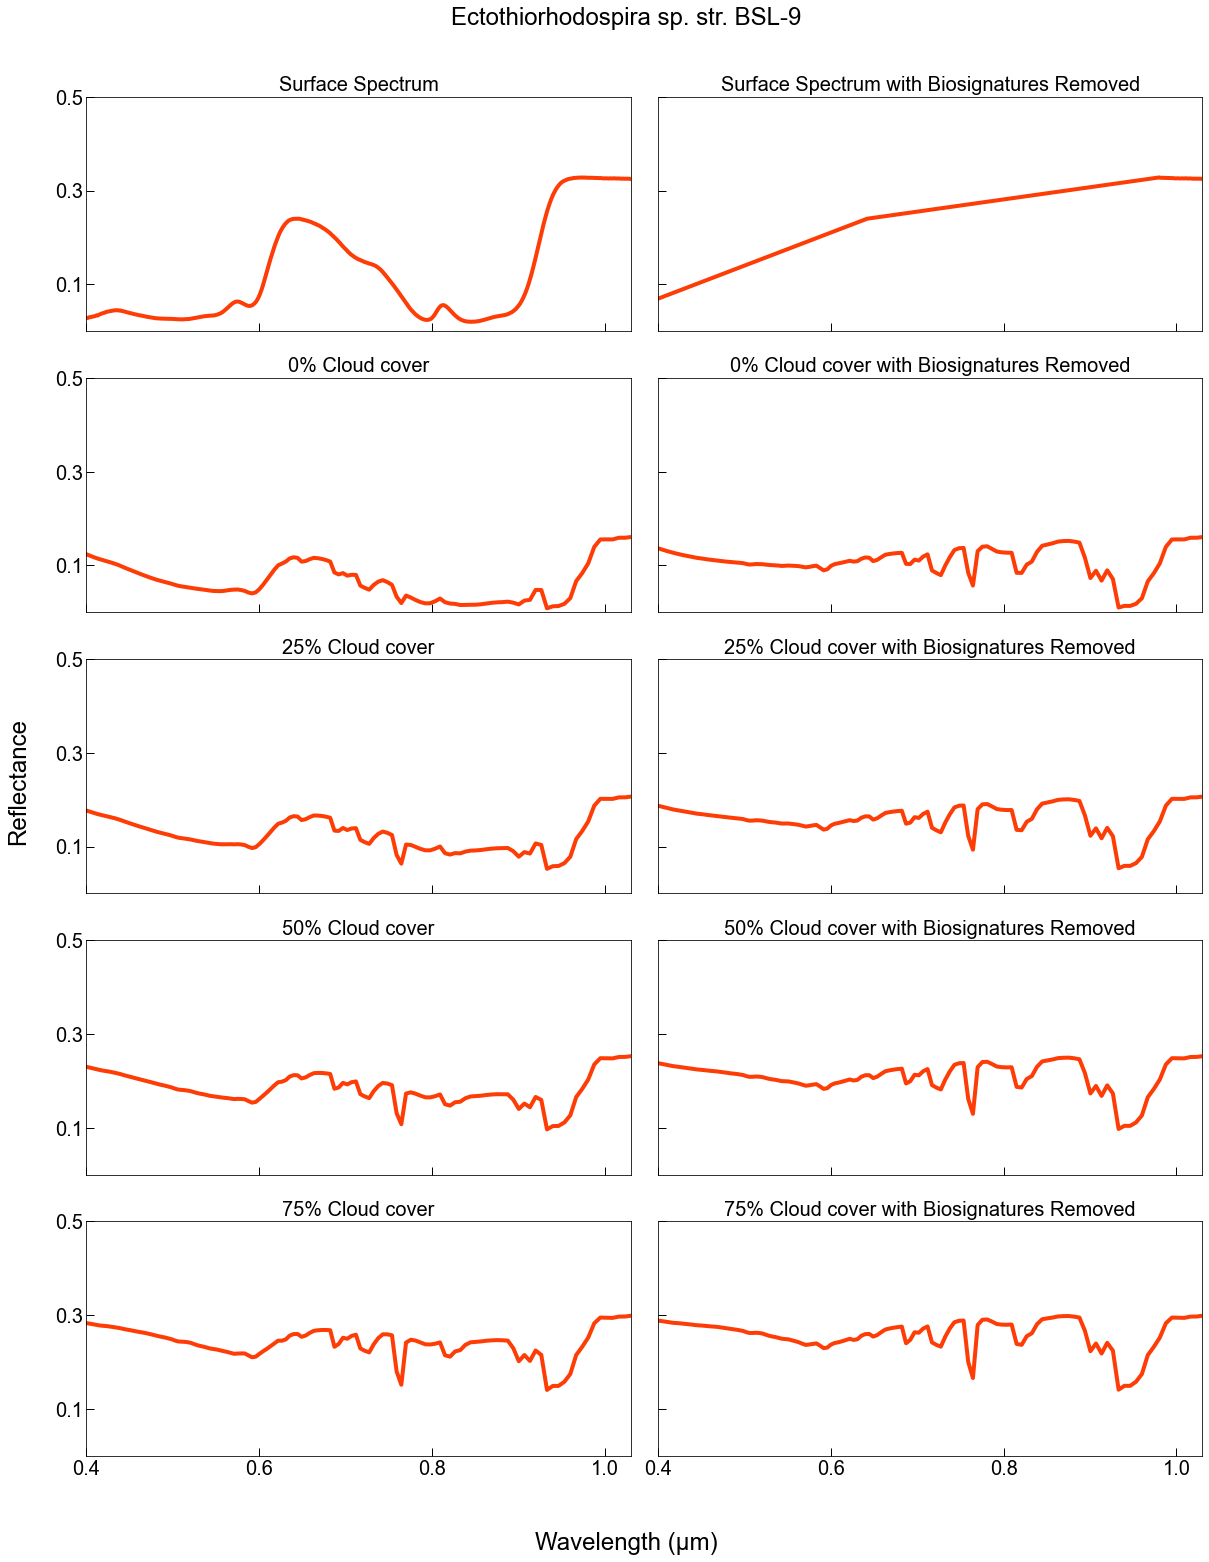

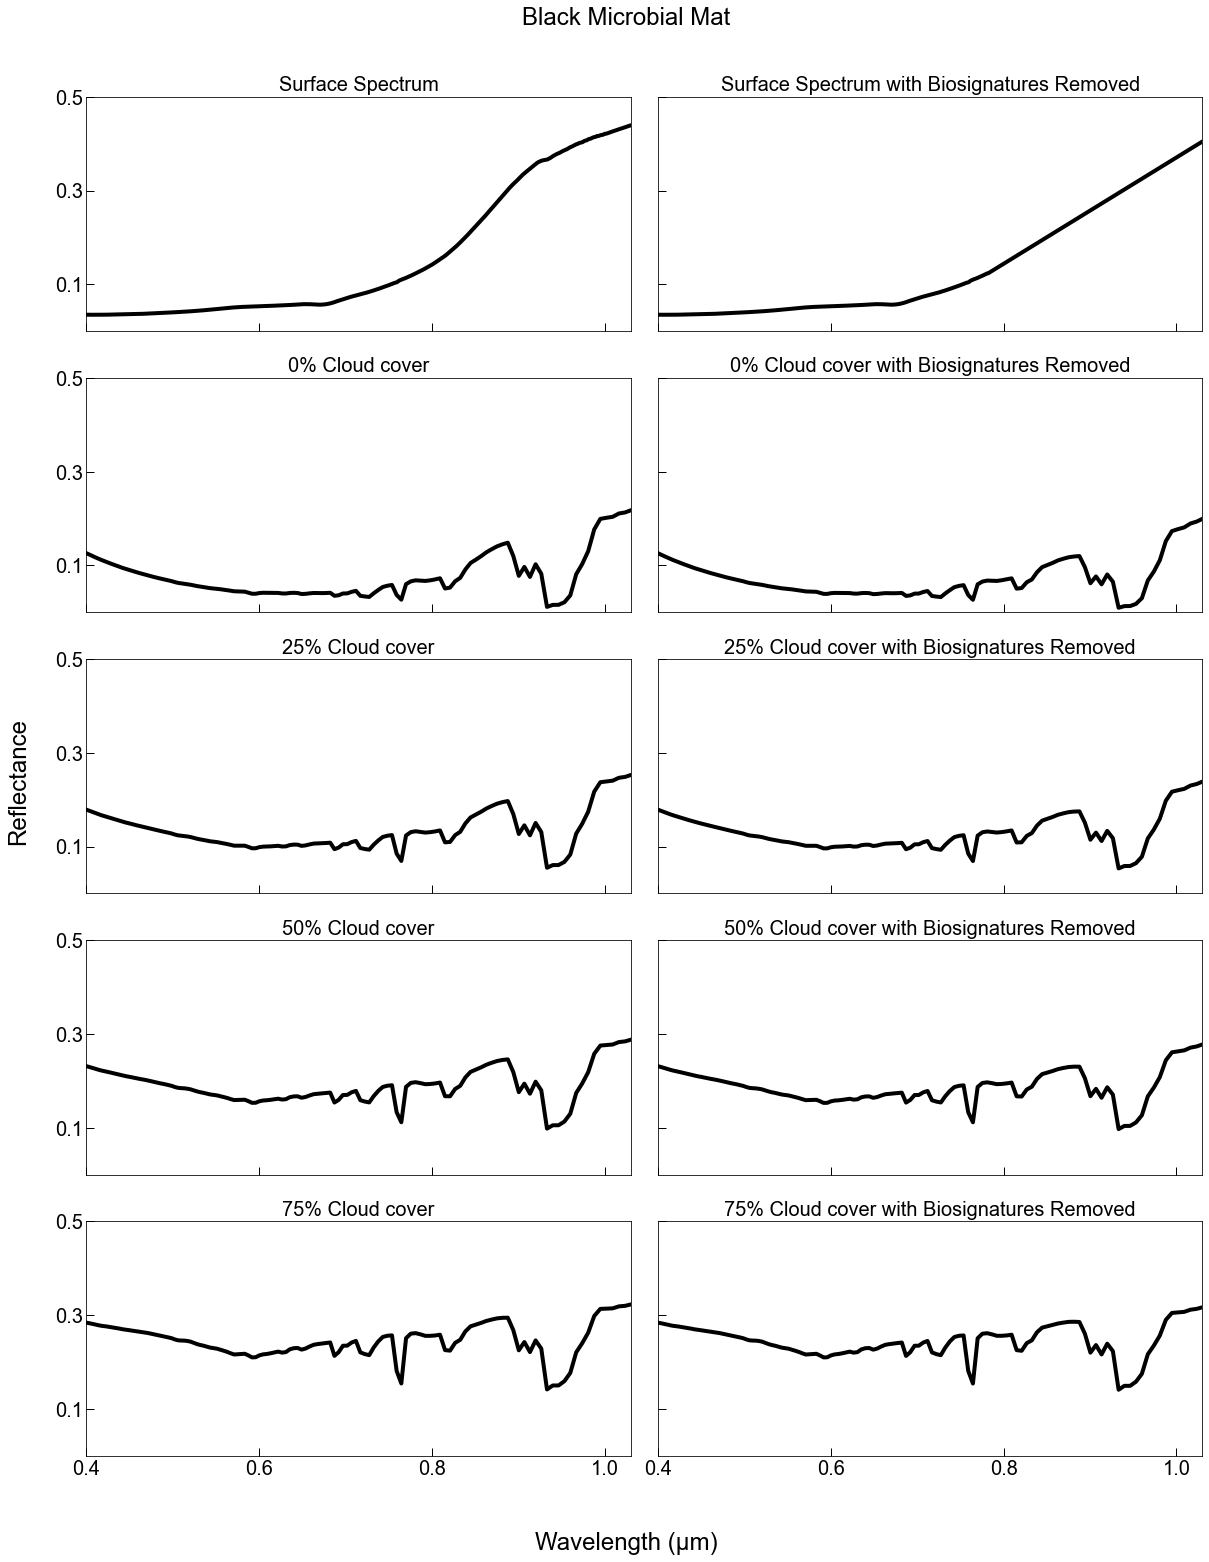

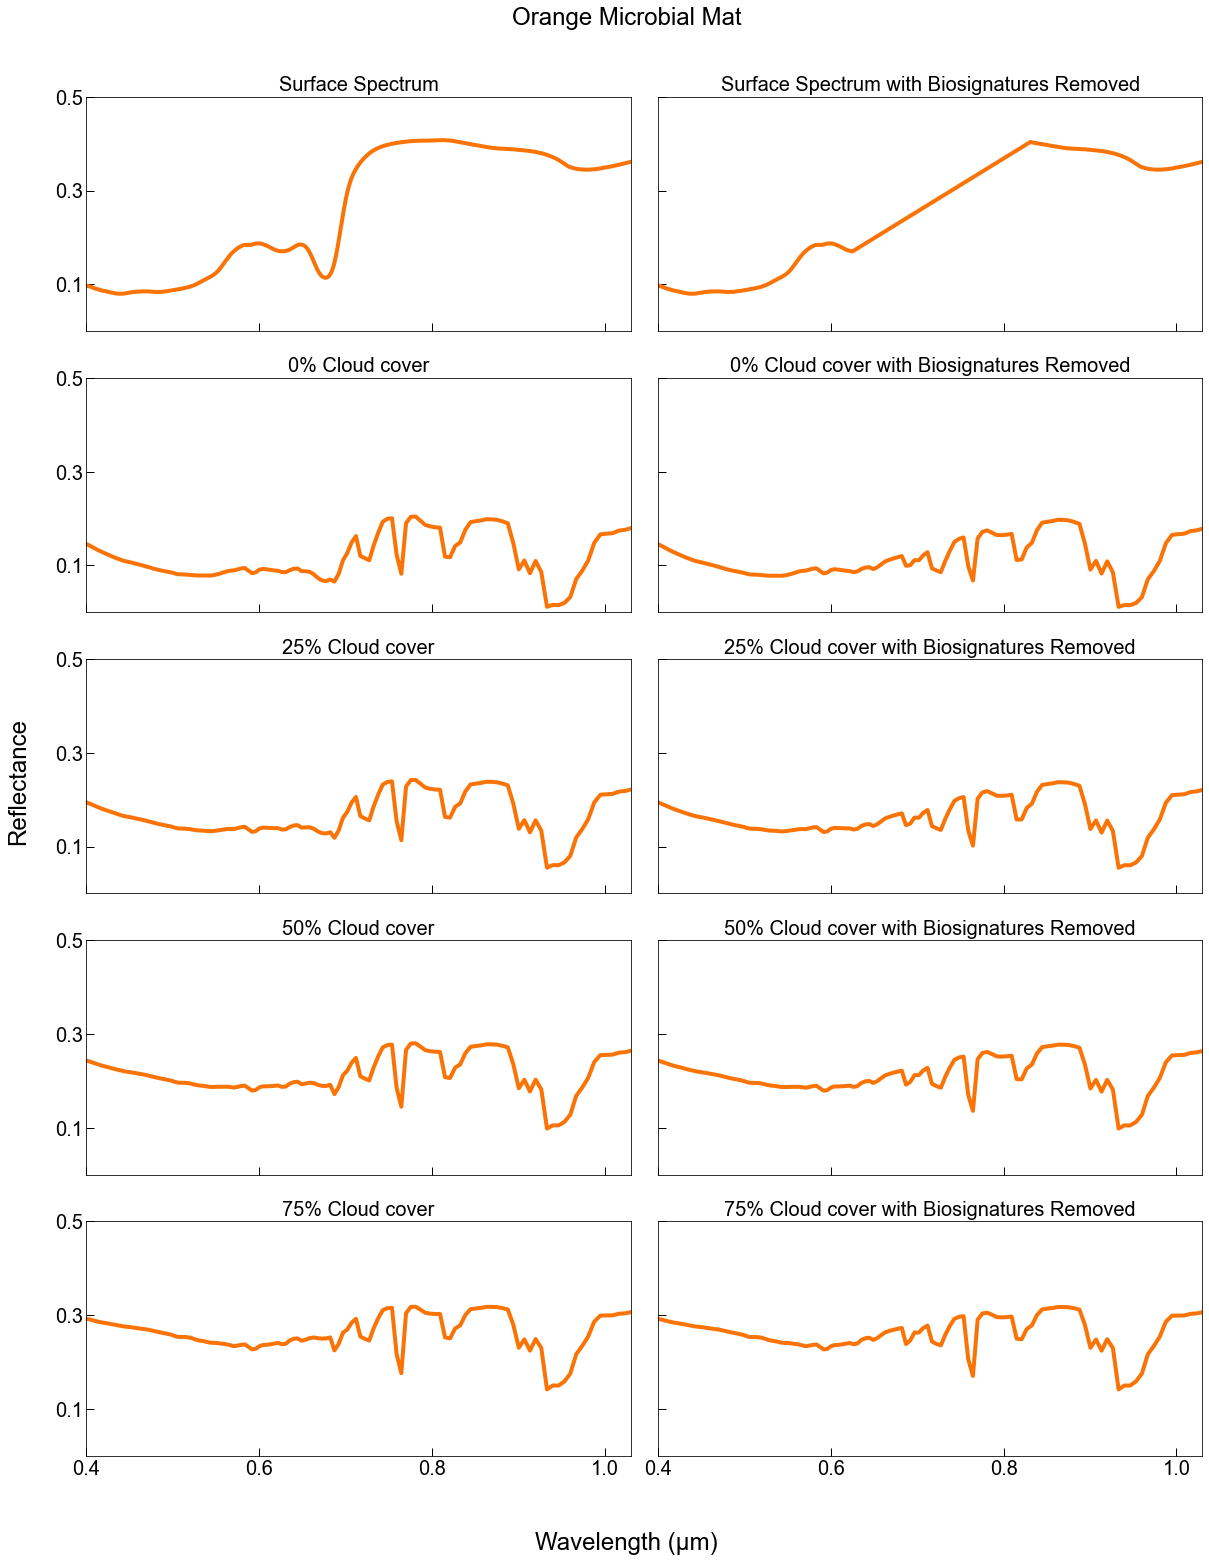

In [4]:
# All microbes' low resolution mixed cloud cover spectra compared with surface spectra

# Plotting all low resolution figures
def mixedcloudcover(title, bioname, abioname, bioname_clear, bioname_25, bioname_50, bioname_75, abioname_clear, \
                    abioname_25, abioname_50, abioname_75, color):
    font = {'fontname':'Arial'}
    
    fig, axs = plt.subplots(5, 2)
    fig.set_size_inches(20, 25)
    fig.set_facecolor('white')
    plt.subplots_adjust(hspace=0.2, wspace=0.05)
    fig.suptitle(title, fontsize=24, y=0.93, **font)
    fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 24, x=0.5, y=0.07, **font)
    fig.supylabel('Reflectance', fontsize = 24, x=0.07, y=0.5, **font)
    xlim=(0.4,1.030)
    ylim=(0,0.5)
    plt.setp(axs, xlim=xlim, ylim=ylim)

    
    # Surface spectra of bio and abio
    axs[0,0].plot(wavelength, bioname.columns[1], color, linewidth=4)
    axs[0,0].set_title('Surface Spectrum', fontsize = 20, **font)
    axs[0,0].tick_params(axis='both', direction='in', length=8, width=1, labelsize=20)
    axs[0,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
    axs[0,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
    for tick in axs[0,0].get_xticklabels():
        tick.set_fontname("Arial")
    for tick in axs[0,0].get_yticklabels():
        tick.set_fontname("Arial")
    axs[0,0].xaxis.set_ticklabels([])

    axs[0,1].plot(wavelength, abioname.columns[1], color, linewidth=4)
    axs[0,1].set_title('Surface Spectrum with Biosignatures Removed', fontsize = 20, **font)
    axs[0,1].tick_params(axis='both', direction='in',length=8, width=1)
    axs[0,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
    axs[0,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
    for tick in axs[0,1].get_xticklabels():
        tick.set_fontname("Arial")
    for tick in axs[0,1].get_yticklabels():
        tick.set_fontname("Arial")
    axs[0,1].yaxis.set_ticklabels([])
    axs[0,1].xaxis.set_ticklabels([])


    # 0% Cloud cover spectra for bio and abio
    axs[1,0].plot(downspec(bioname_clear[1], bioname_clear[0])[0], downspec(bioname_clear[1], bioname_clear[0])[1],\
                  color,linewidth=4)
    axs[1,0].set_title('0% Cloud cover', fontsize = 20, **font)
    axs[1,0].tick_params(axis='both', direction='in', length=8, width=1, labelsize=20)
    axs[1,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
    axs[1,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
    for tick in axs[1,0].get_xticklabels():
        tick.set_fontname("Arial")
    for tick in axs[1,0].get_yticklabels():
        tick.set_fontname("Arial")
    axs[1,0].xaxis.set_ticklabels([])

    axs[1,1].plot(downspec(abioname_clear[1], abioname_clear[0])[0], downspec(abioname_clear[1], abioname_clear[0])[1],\
                  color, linewidth=4)
    axs[1,1].set_title('0% Cloud cover with Biosignatures Removed', fontsize = 20, **font)
    axs[1,1].tick_params(axis='both', direction='in',length=8, width=1)
    axs[1,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
    axs[1,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
    for tick in axs[1,1].get_xticklabels():
        tick.set_fontname("Arial")
    for tick in axs[1,1].get_yticklabels():
        tick.set_fontname("Arial")
    axs[1,1].yaxis.set_ticklabels([])
    axs[1,1].xaxis.set_ticklabels([])


    # 25% Cloud cover spectra for bio and abio
    axs[2,0].plot(downspec(bioname_25[1], bioname_25[0])[0], downspec(bioname_25[1], bioname_25[0])[1],\
                  color, linewidth=4)
    axs[2,0].set_title('25% Cloud cover', fontsize = 20, **font)
    axs[2,0].tick_params(axis='both', direction='in', length=8, width=1, labelsize=20)
    axs[2,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
    axs[2,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
    for tick in axs[2,0].get_xticklabels():
        tick.set_fontname("Arial")
    for tick in axs[2,0].get_yticklabels():
        tick.set_fontname("Arial")
    axs[2,0].xaxis.set_ticklabels([])

    axs[2,1].plot(downspec(abioname_25[1], abioname_25[0])[0], downspec(abioname_25[1], abioname_25[0])[1], \
                  color, linewidth=4)
    axs[2,1].set_title('25% Cloud cover with Biosignatures Removed', fontsize = 20, **font)
    axs[2,1].tick_params(axis='both', direction='in', length=8, width=1, labelsize=20)
    axs[2,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
    axs[2,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
    for tick in axs[2,1].get_xticklabels():
        tick.set_fontname("Arial")
    for tick in axs[2,1].get_yticklabels():
        tick.set_fontname("Arial")
    axs[2,1].yaxis.set_ticklabels([])
    axs[2,1].xaxis.set_ticklabels([])

    
    # 50% Cloud cover spectra for bio and abio
    axs[3,0].plot(downspec(bioname_50[1], bioname_50[0])[0], downspec(bioname_50[1], bioname_50[0])[1], \
                  color, linewidth=4)
    axs[3,0].set_title('50% Cloud cover', fontsize = 20, **font)
    axs[3,0].tick_params(axis='both', direction='in', length=8, width=1, labelsize=20)
    axs[3,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
    axs[3,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
    for tick in axs[3,0].get_xticklabels():
        tick.set_fontname("Arial")
    for tick in axs[3,0].get_yticklabels():
        tick.set_fontname("Arial")
    axs[3,0].xaxis.set_ticklabels([])

    axs[3,1].plot(downspec(abioname_50[1], abioname_50[0])[0], downspec(abioname_50[1], abioname_50[0])[1], \
                  color, linewidth=4)
    axs[3,1].set_title('50% Cloud cover with Biosignatures Removed', fontsize = 20, **font)
    axs[3,1].tick_params(axis='both', direction='in', length=8, width=1, labelsize=20)
    axs[3,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
    axs[3,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
    for tick in axs[3,1].get_xticklabels():
        tick.set_fontname("Arial")
    for tick in axs[3,1].get_yticklabels():
        tick.set_fontname("Arial")
    axs[3,1].yaxis.set_ticklabels([])
    axs[3,1].xaxis.set_ticklabels([])
   
    
    # 75% Cloud cover spectra for bio and abio
    axs[4,0].plot(downspec(bioname_75[1], bioname_75[0])[0], downspec(bioname_75[1], bioname_75[0])[1],\
                  color, linewidth=4)
    axs[4,0].set_title('75% Cloud cover', fontsize = 20, **font)
    axs[4,0].tick_params(axis='both', direction='in', length=8, width=1, labelsize=20)
    axs[4,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
    axs[4,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
    for tick in axs[4,0].get_xticklabels():
        tick.set_fontname("Arial")
    for tick in axs[4,0].get_yticklabels():
        tick.set_fontname("Arial")
    
    axs[4,1].plot(downspec(abioname_75[1], abioname_75[0])[0], downspec(abioname_75[1], abioname_75[0])[1],\
                  color, linewidth=4)
    axs[4,1].set_title('75% Cloud cover with Biosignatures Removed', fontsize = 20, **font)
    axs[4,1].tick_params(axis='both', direction='in', length=8, width=1, labelsize=20)
    
    axs[4,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
    axs[4,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
    for tick in axs[4,1].get_xticklabels():
        tick.set_fontname("Arial")
    for tick in axs[4,1].get_yticklabels():
        tick.set_fontname("Arial")
    axs[4,1].yaxis.set_ticklabels([])
    
    #plt.savefig('Mixed_cloud_cover_' + title + '_lowres_20220413.png')

mixedcloudcover('Arthrobacter sp.', surfacetxt['Arthrobacter.txt'], surfacetxt['Arthro_pigment_scrub.txt'], \
                clearrad['Arthro_clearSky_mon_toa.rad'], mixedtxt['Arthro_mixed25.txt'], mixedtxt['Arthro_mixed50.txt'], \
                mixedtxt['Arthro_mixed75.txt'], clearrad['Arthro_clearSky_scrubbed_updated_mon_toa.rad'], \
                mixedtxt['Arthro_mixed25_scrubbed.txt'], mixedtxt['Arthro_mixed50_scrubbed.txt'], \
                mixedtxt['Arthro_mixed75_scrubbed.txt'],'xkcd:peach')
mixedcloudcover('Ectothiorhodospira sp. str. BSL-9', surfacetxt['Ectothiorhodospira.txt'], surfacetxt['Ectoth_pigment_scrub.txt'],\
                clearrad['Ecto_clearSky_new_toa.rad'], mixedtxt['Ectoth_mixed25.txt'], mixedtxt['Ectoth_mixed50.txt'],\
                mixedtxt['Ectoth_mixed75.txt'], clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'], \
                mixedtxt['Ectoth_mixed25_scrubbed.txt'], mixedtxt['Ectoth_mixed50_scrubbed.txt'], \
                mixedtxt['Ectoth_mixed75_scrubbed.txt'], 'xkcd:red orange')
mixedcloudcover('Black Microbial Mat', black, surfacetxt['black_scrubbed.txt'], clearrad['black_clearSky_mon_toa.rad'],\
                mixedtxt['blackmat_mixed25.txt'], mixedtxt['blackmat_mixed50.txt'], mixedtxt['blackmat_mixed75.txt'],\
                clearrad['black_clearSky_scrubbed_mon_toa.rad'], mixedtxt['blackmat_mixed25_scrubbed.txt'],\
                mixedtxt['blackmat_mixed50_scrubbed.txt'], mixedtxt['blackmat_mixed75_scrubbed.txt'], 'xkcd:black')
mixedcloudcover('Orange Microbial Mat', orange, surfacetxt['orangemat_scrubbed.txt'], clearrad['orangemat_clearSky_mon_toa.rad'],\
                mixedtxt['orangemat_mixed25.txt'], mixedtxt['orangemat_mixed50.txt'], mixedtxt['orangemat_mixed75.txt'],\
                clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'], mixedtxt['orangemat_mixed25_scrubbed.txt'],\
                mixedtxt['orangemat_mixed50_scrubbed.txt'],mixedtxt['orangemat_mixed75_scrubbed.txt'], 'xkcd:orange')




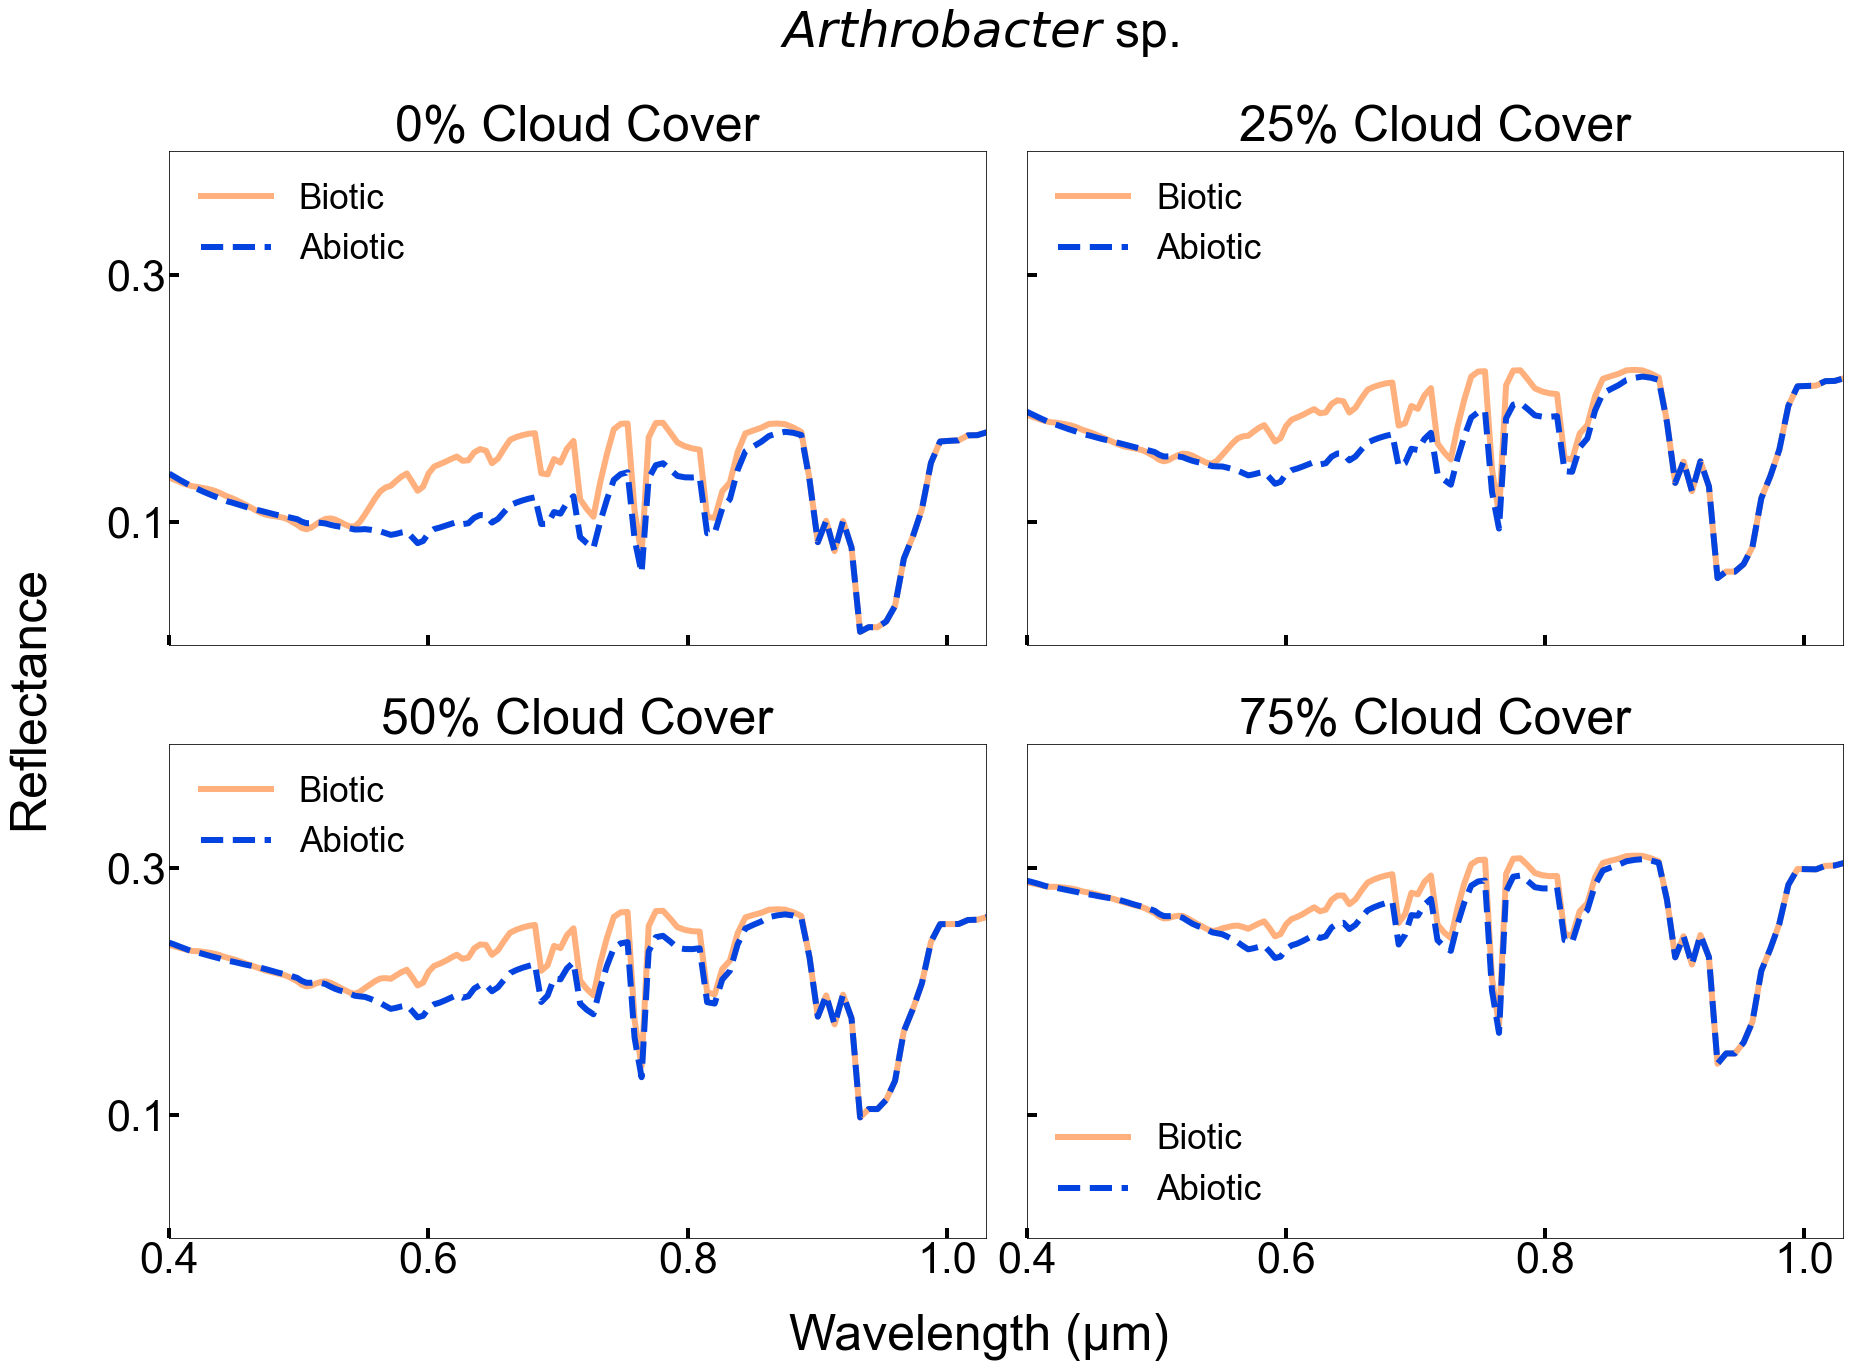

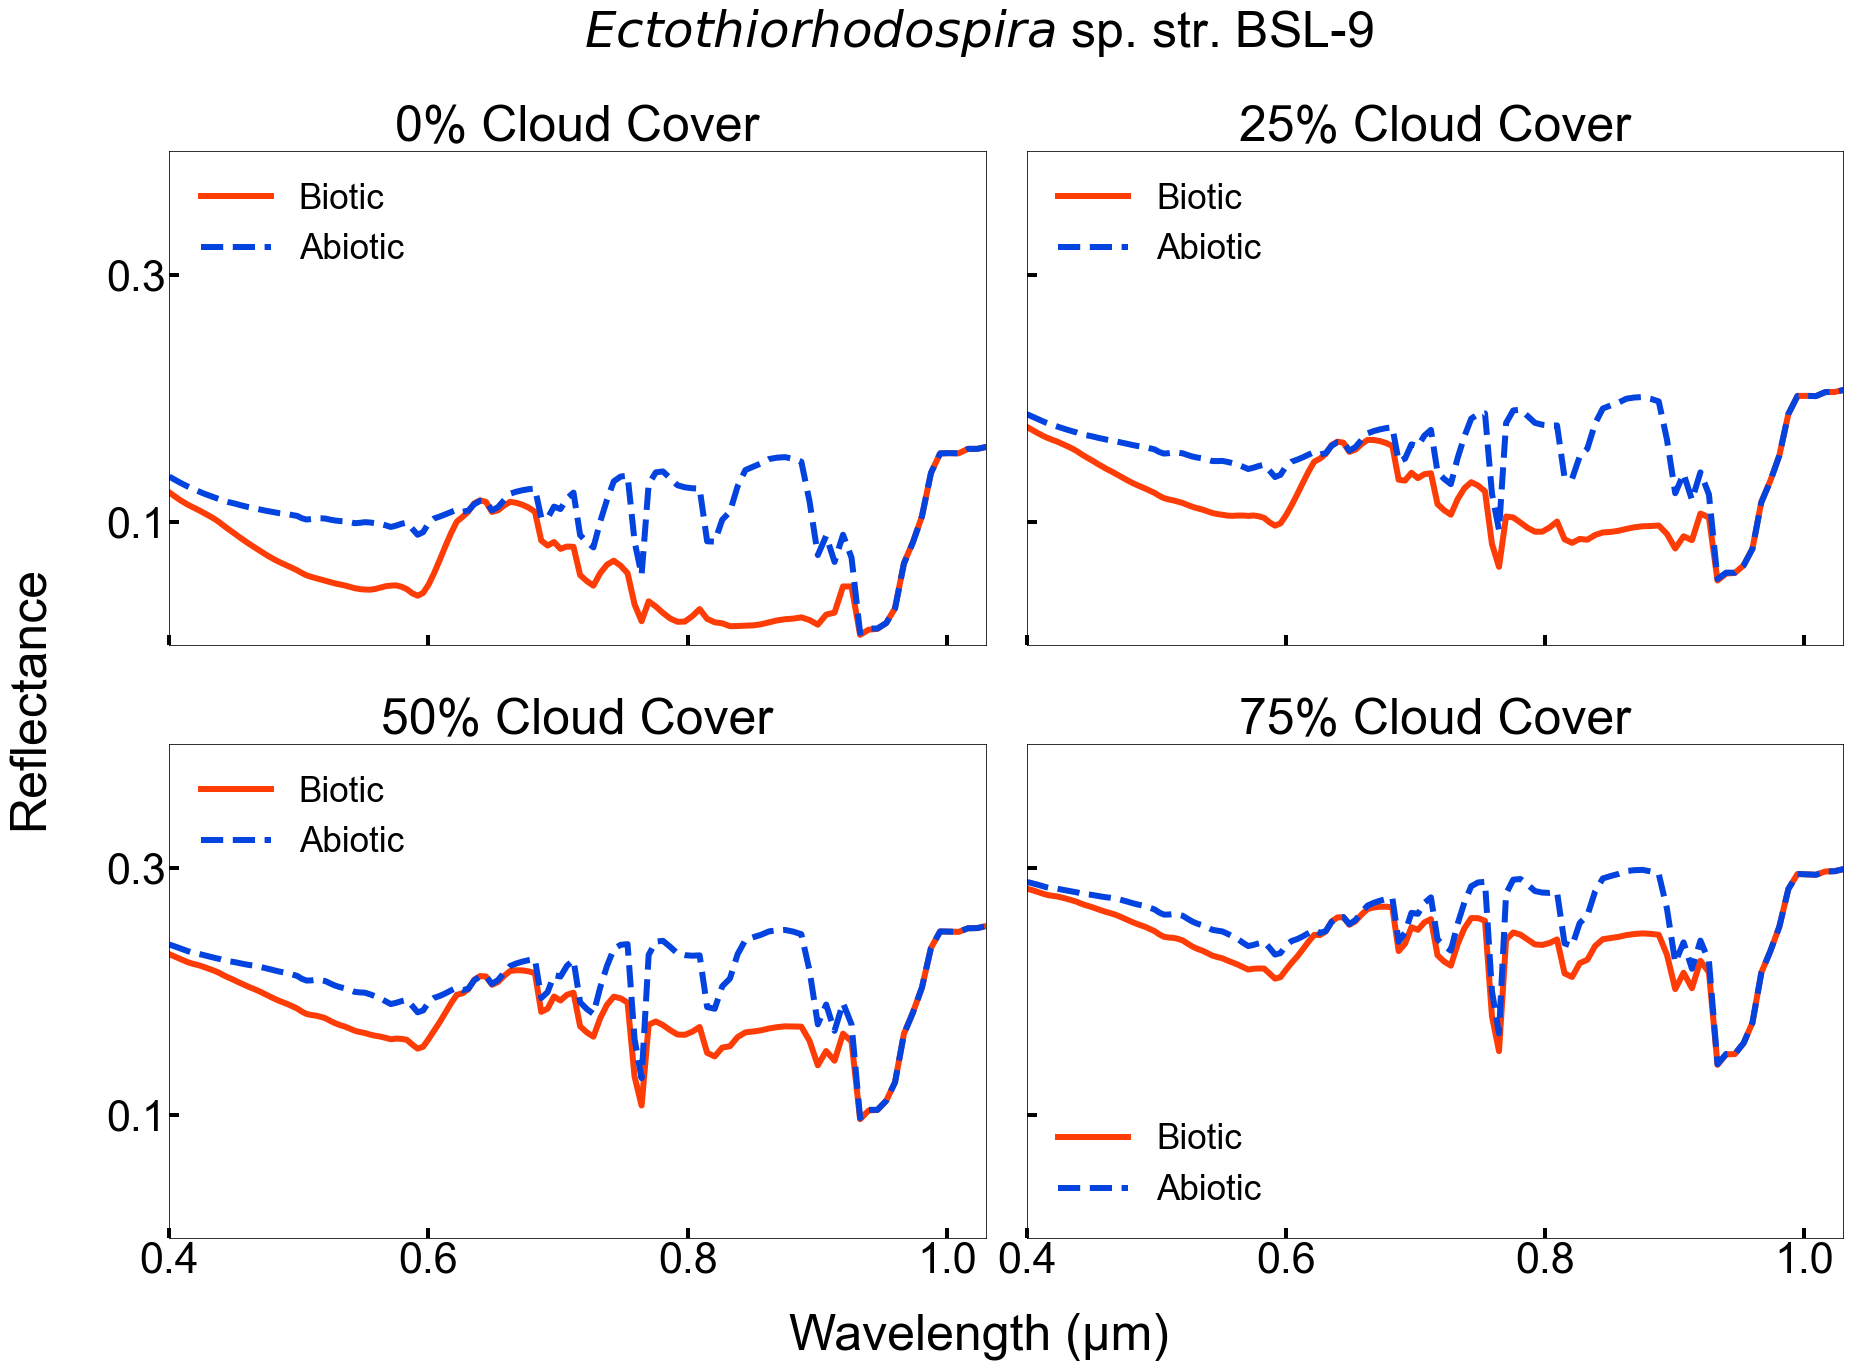

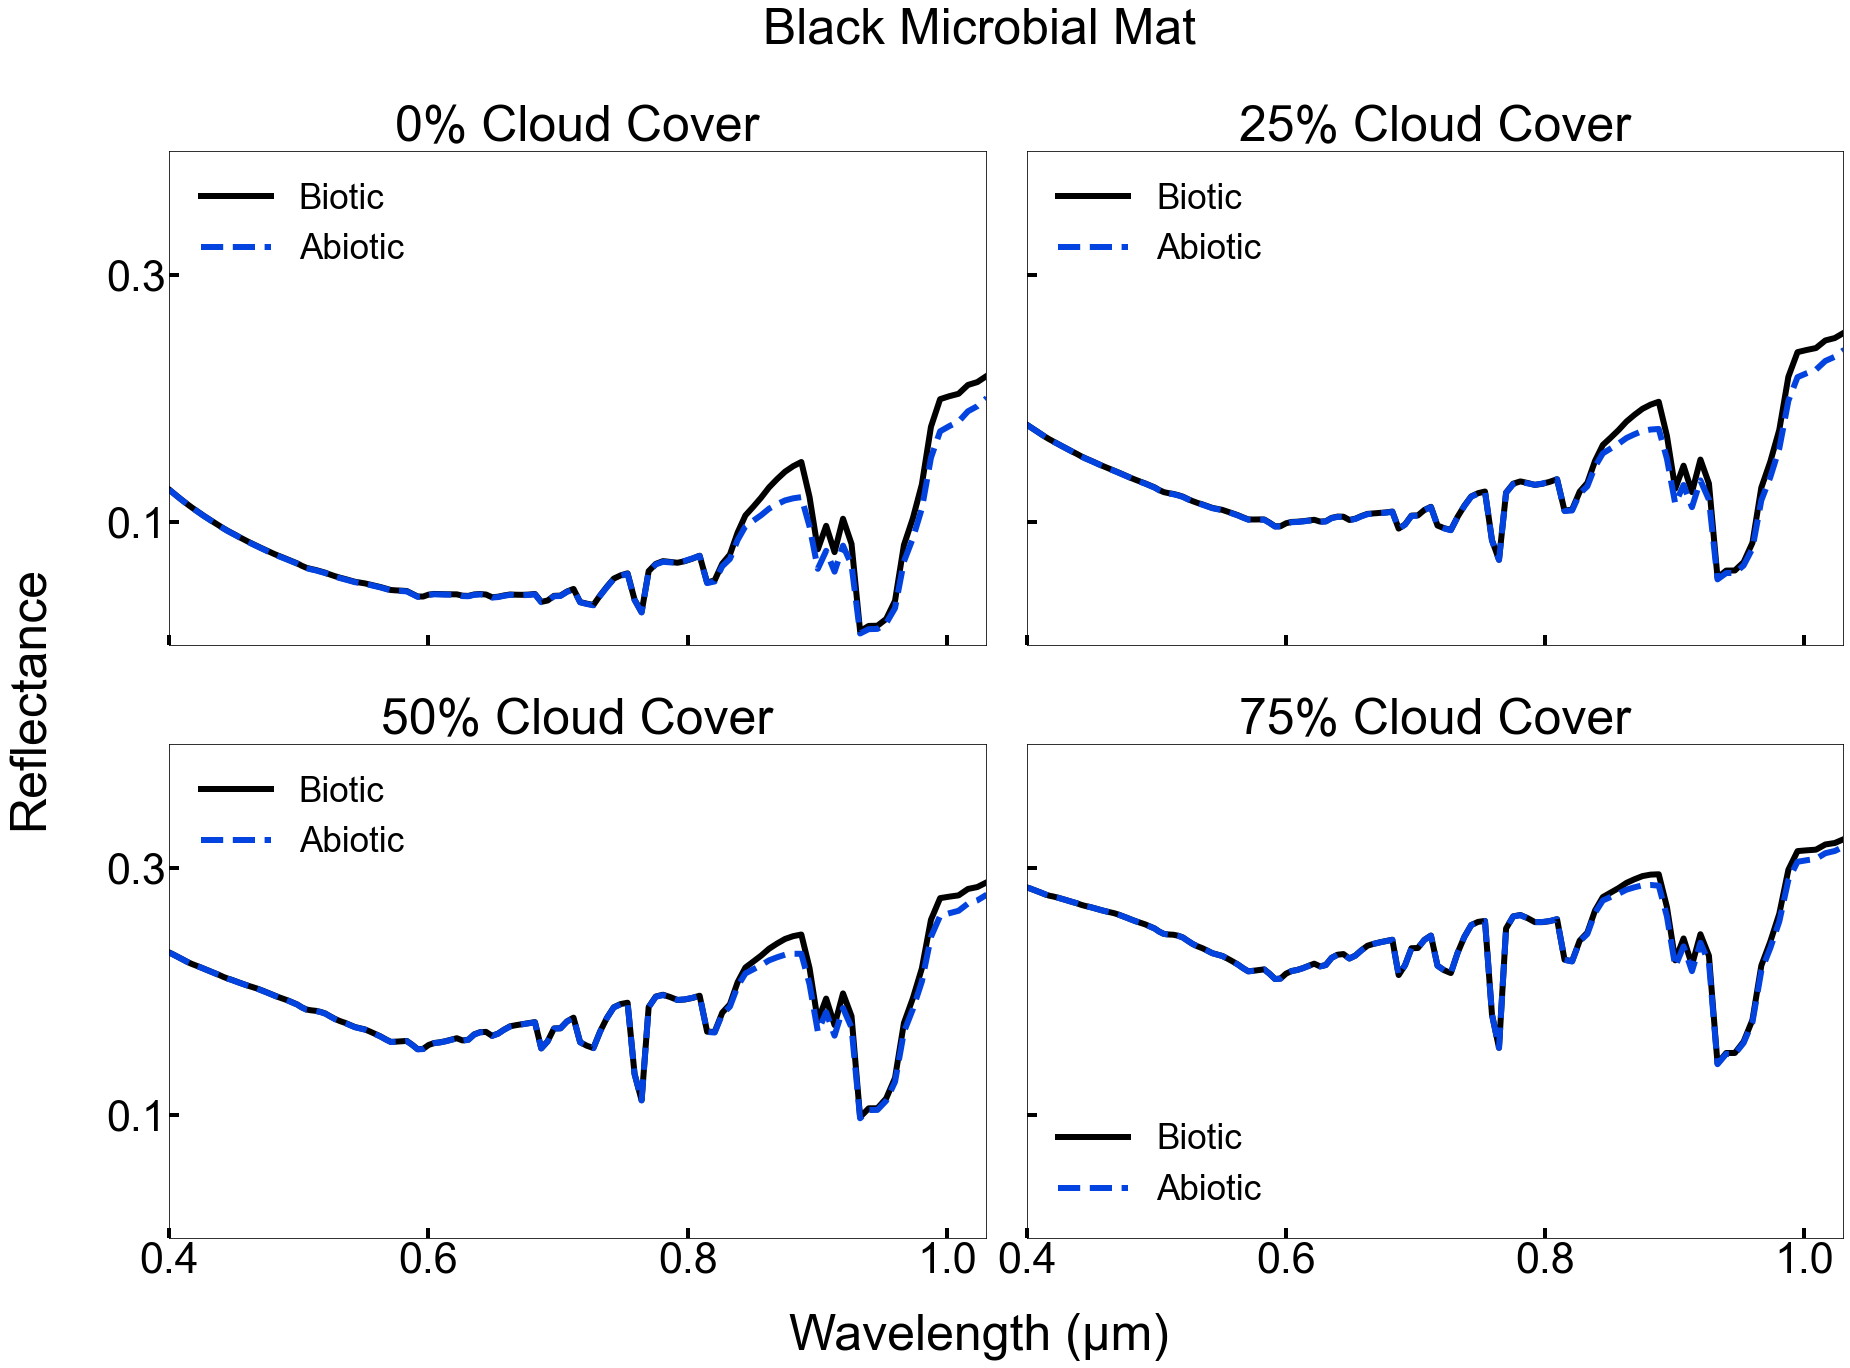

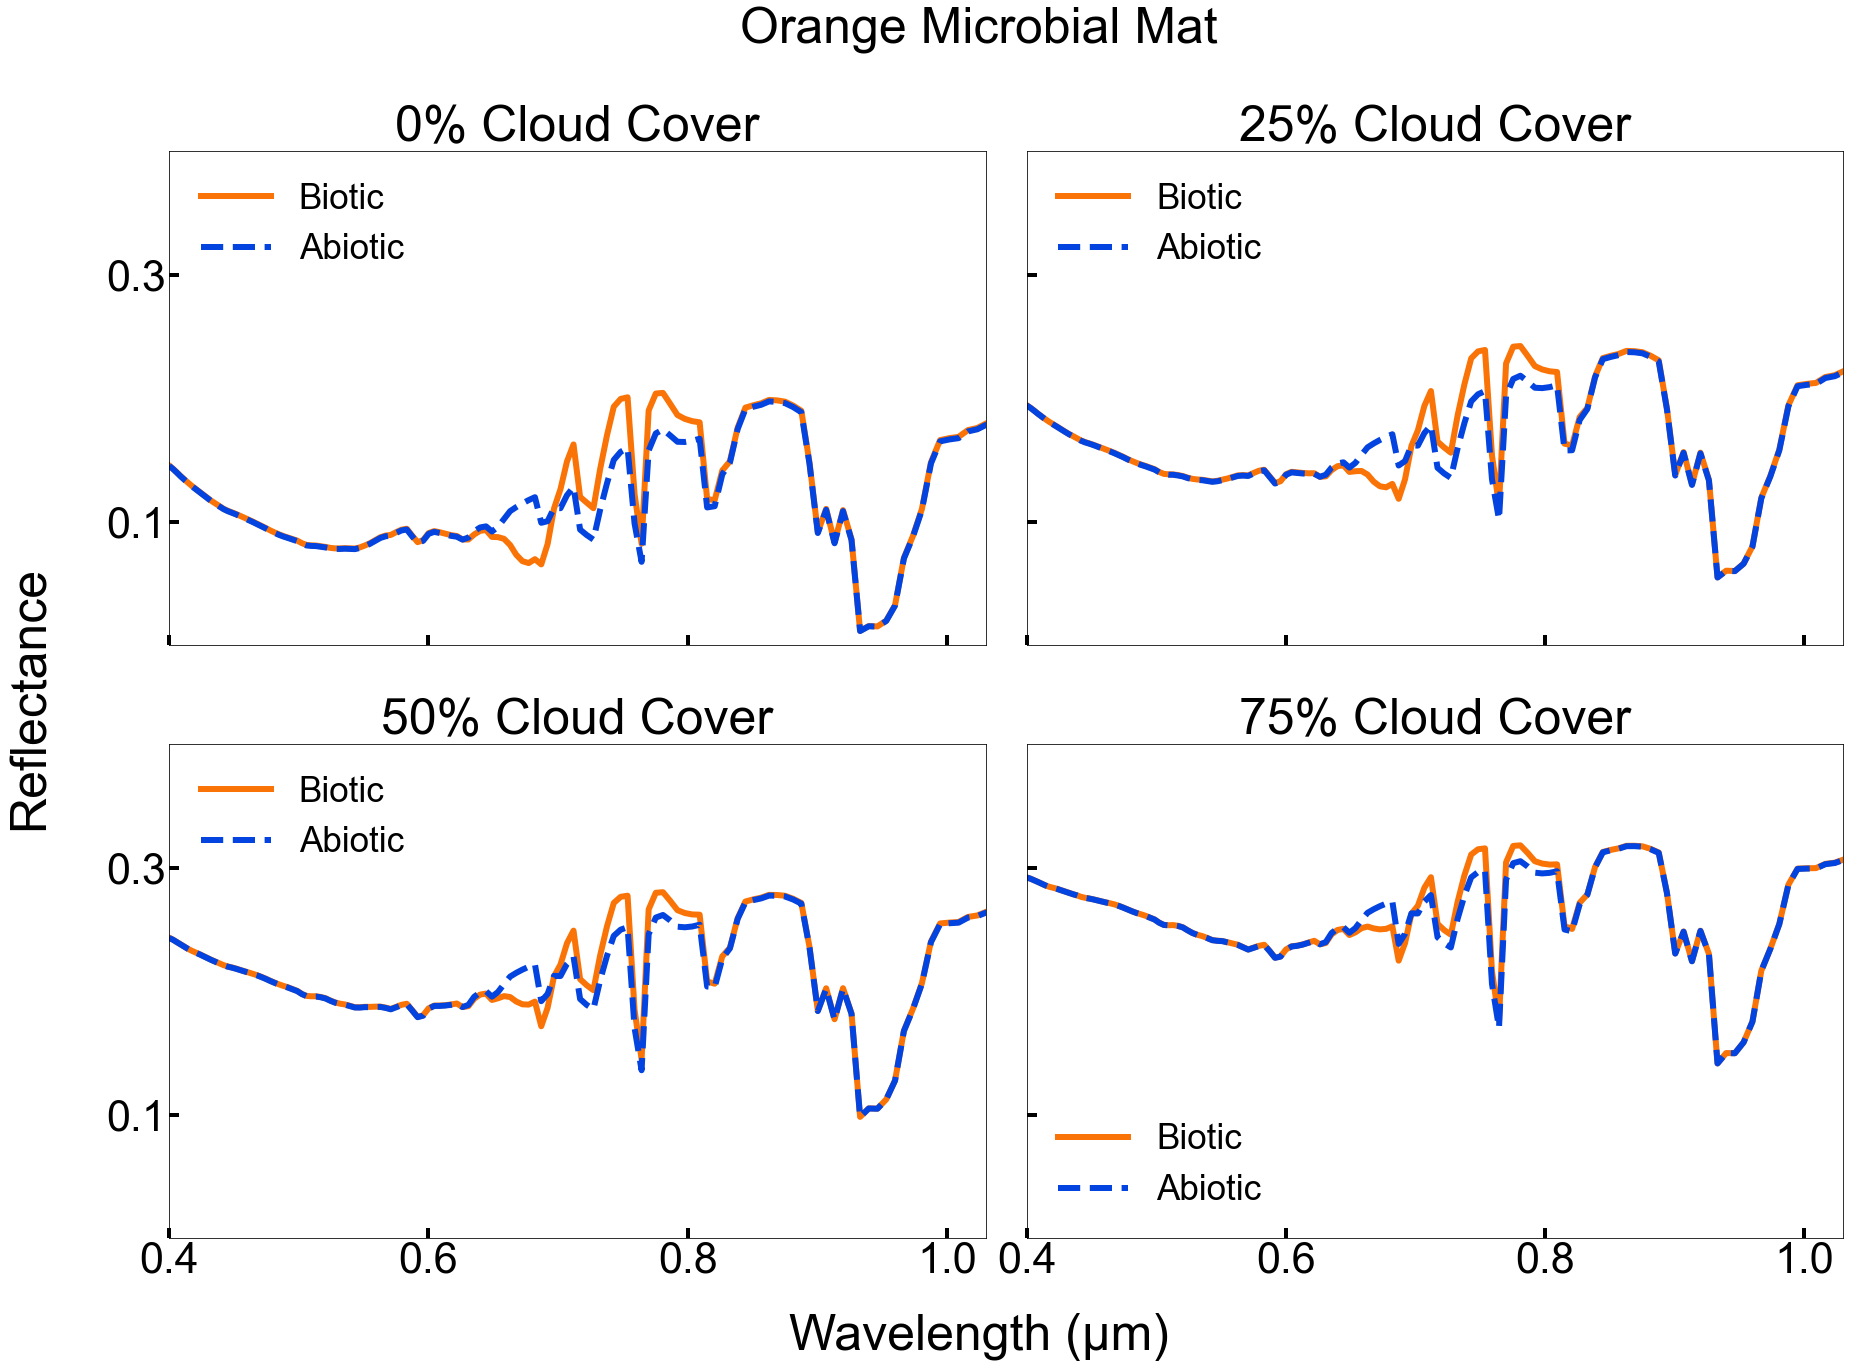

In [50]:
#Mixed cloud spectra bio and abio together

def abiobio(title, bio_0, bio_25, bio_50, bio_75, abio_0, abio_25, abio_50, abio_75, color1, color2):
    font = {'fontname':'Arial'}

    fig, axs = plt.subplots(2, 2)
    fig.set_size_inches(30, 20)
    fig.set_facecolor('white')
    fig.suptitle(title, fontsize=50, y=0.98, **font)
    plt.subplots_adjust(hspace=0.2, wspace=0.05)
    fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 50, x=0.5, y=0.04, **font)
    fig.supylabel('Reflectance', fontsize = 50, x=0.05, y=0.5, **font)
    xlim=(0.4,1.030)
    ylim=(0,0.4)
    plt.setp(axs, xlim=xlim, ylim=ylim)
    legparams = font_manager.FontProperties(family = 'Arial', size = 35)

    # 0% Cloud Cover 
    axs[0,0].plot(downspec(bio_0[1], bio_0[0])[0], downspec(bio_0[1], bio_0[0])[1],\
                  color1,linewidth=6, label = 'Biotic')
    axs[0,0].plot(downspec(abio_0[1], abio_0[0])[0], downspec(abio_0[1], abio_0[0])[1],\
                  color2,linewidth=6, ls = 'dashed', label = 'Abiotic')
    axs[0,0].set_title('0% Cloud Cover', fontsize = 50, **font)
    axs[0,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
    axs[0,0].set_yticks(np.arange(0.1, 0.5, step=0.2))
    axs[0,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
    for tick in axs[0,0].get_xticklabels():
        tick.set_fontname("Arial")
    for tick in axs[0,0].get_yticklabels():
        tick.set_fontname("Arial")
    axs[0,0].xaxis.set_ticklabels([])
    axs[0,0].legend(fontsize = 20, loc = 'upper left', ncol=1, prop = legparams, frameon=False)
    

    # 25% Cloud Cover
    axs[0,1].plot(downspec(bio_25[1], bio_25[0])[0], downspec(bio_25[1], bio_25[0])[1],\
                  color1,linewidth=6, label = 'Biotic')
    axs[0,1].plot(downspec(abio_25[1], abio_25[0])[0], downspec(abio_25[1], abio_25[0])[1],\
                  color2,linewidth=6, ls = 'dashed', label = 'Abiotic')
    axs[0,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
    axs[0,1].set_title('25% Cloud Cover', fontsize = 50, **font)
    axs[0,1].set_yticks(np.arange(0.1, 0.5, step=0.2))
    axs[0,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
    for tick in axs[0,1].get_xticklabels():
        tick.set_fontname("Arial")
    for tick in axs[0,1].get_yticklabels():
        tick.set_fontname("Arial")
    axs[0,1].yaxis.set_ticklabels([])
    axs[0,1].xaxis.set_ticklabels([])
    axs[0,1].legend(fontsize = 20, loc = 'upper left', ncol=1, prop = legparams, frameon=False)

    # 50% Cloud Cover
    axs[1,0].plot(downspec(bio_50[1], bio_50[0])[0], downspec(bio_50[1], bio_50[0])[1],\
                  color1,linewidth=6, label = 'Biotic')
    axs[1,0].plot(downspec(abio_50[1], abio_50[0])[0], downspec(abio_50[1], abio_50[0])[1],\
                  color2,linewidth=6, ls = 'dashed', label = 'Abiotic')
    axs[1,0].set_title('50% Cloud Cover', fontsize = 50, **font)
    axs[1,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
    axs[1,0].set_yticks(np.arange(0.1, 0.5, step=0.2))
    axs[1,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
    for tick in axs[1,0].get_xticklabels():
        tick.set_fontname("Arial")
    for tick in axs[1,0].get_yticklabels():
        tick.set_fontname("Arial")
    axs[1,0].legend(fontsize = 20, loc = 'upper left', ncol=1, prop = legparams, frameon=False)

    # 75% Cloud Cover
    axs[1,1].plot(downspec(bio_75[1], bio_75[0])[0], downspec(bio_75[1], bio_75[0])[1],\
                  color1,linewidth=6, label = 'Biotic')
    axs[1,1].plot(downspec(abio_75[1], abio_75[0])[0], downspec(abio_75[1], abio_75[0])[1],\
                  color2,linewidth=6, ls = 'dashed', label = 'Abiotic')
    axs[1,1].set_title('75% Cloud Cover', fontsize = 50, **font)
    axs[1,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
    axs[1,1].set_yticks(np.arange(0.1, 0.5, step=0.2))
    axs[1,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
    for tick in axs[1,1].get_xticklabels():
        tick.set_fontname("Arial")
    for tick in axs[1,1].get_yticklabels():
        tick.set_fontname("Arial")
    axs[1,1].yaxis.set_ticklabels([])
    axs[1,1].legend(fontsize = 20, loc = 'lower left', ncol=1, prop = legparams, frameon=False)
    
    plt.savefig('Mixed_cloud_abio+bio_' + title + '_lowres_20220503.png')
    
abiobio('$\it{Arthrobacter}$ sp.', clearrad['Arthro_clearSky_mon_toa.rad'], mixedtxt['Arthro_mixed25.txt'], \
        mixedtxt['Arthro_mixed50.txt'], mixedtxt['Arthro_mixed75.txt'], \
        clearrad['Arthro_clearSky_scrubbed_updated_mon_toa.rad'], mixedtxt['Arthro_mixed25_scrubbed.txt'], \
        mixedtxt['Arthro_mixed50_scrubbed.txt'], mixedtxt['Arthro_mixed75_scrubbed.txt'],'xkcd:peach', 'xkcd:blue')
abiobio('$\it{Ectothiorhodospira}$ sp. str. BSL-9', clearrad['Ecto_clearSky_new_toa.rad'], mixedtxt['Ectoth_mixed25.txt'],\
        mixedtxt['Ectoth_mixed50.txt'],mixedtxt['Ectoth_mixed75.txt'],\
        clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'], mixedtxt['Ectoth_mixed25_scrubbed.txt'],\
        mixedtxt['Ectoth_mixed50_scrubbed.txt'], mixedtxt['Ectoth_mixed75_scrubbed.txt'], 'xkcd:red orange', 'xkcd:blue')
abiobio('Black Microbial Mat', clearrad['black_clearSky_mon_toa.rad'],mixedtxt['blackmat_mixed25.txt'],\
        mixedtxt['blackmat_mixed50.txt'], mixedtxt['blackmat_mixed75.txt'],\
        clearrad['black_clearSky_scrubbed_mon_toa.rad'], mixedtxt['blackmat_mixed25_scrubbed.txt'],\
        mixedtxt['blackmat_mixed50_scrubbed.txt'], mixedtxt['blackmat_mixed75_scrubbed.txt'], 'xkcd:black', 'xkcd:blue')
abiobio('Orange Microbial Mat', clearrad['orangemat_clearSky_mon_toa.rad'],mixedtxt['orangemat_mixed25.txt'],\
        mixedtxt['orangemat_mixed50.txt'], mixedtxt['orangemat_mixed75.txt'],\
        clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'], mixedtxt['orangemat_mixed25_scrubbed.txt'],\
        mixedtxt['orangemat_mixed50_scrubbed.txt'],mixedtxt['orangemat_mixed75_scrubbed.txt'], 'xkcd:orange', 'xkcd:blue')


[Text(0, 0.1, ''), Text(0, 0.30000000000000004, '')]

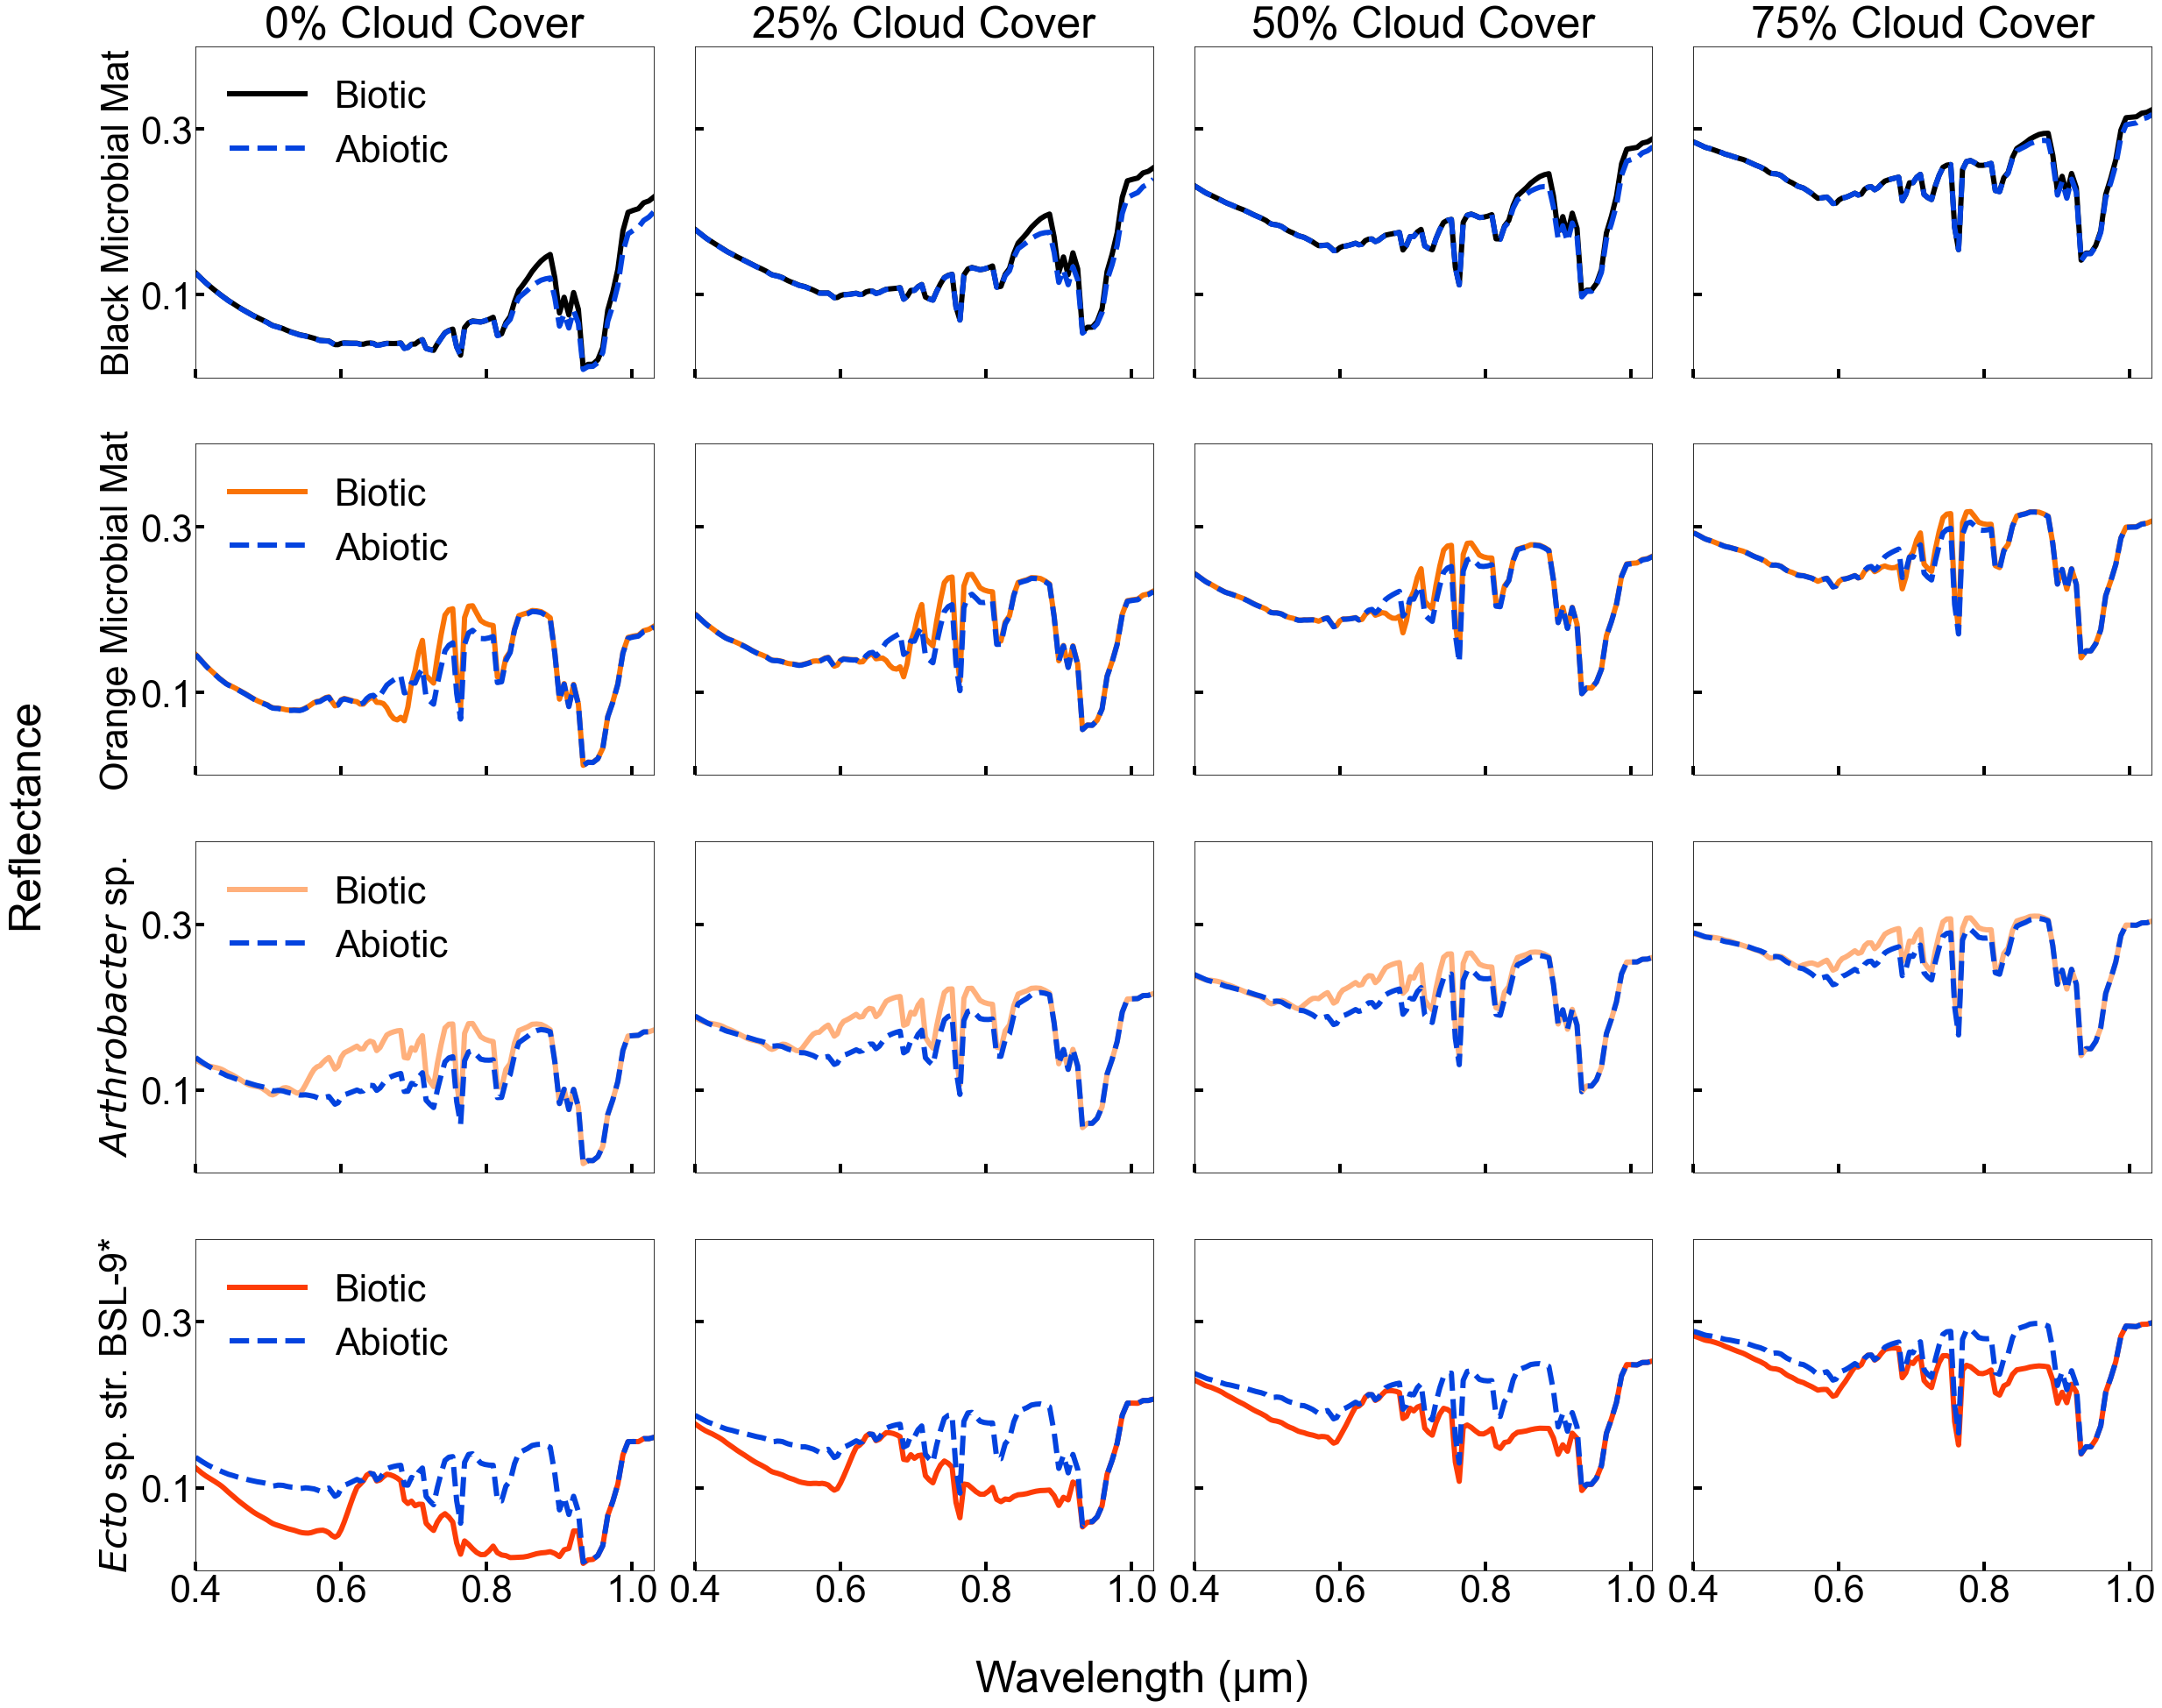

In [51]:
# All of the above spectra plotted in one MEGA-FIGURE


font = {'fontname':'Arial'}

fig, axs = plt.subplots(4, 4)
fig.set_size_inches(40, 32)
fig.set_facecolor('white')
#fig.suptitle('', fontsize=50, y=0.98, **font)
plt.subplots_adjust(hspace=0.2, wspace=0.09)
fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 50, x=0.5, y=0.06, **font)
fig.supylabel('Reflectance', fontsize = 50, x=0.05, y=0.5, **font)
xlim=(0.4,1.030)
ylim=(0,0.4)
plt.setp(axs, xlim=xlim, ylim=ylim)
legparams = font_manager.FontProperties(family = 'Arial', size = 43)

# Black Microbial Mat
    
# 0% Cloud Cover 
axs[0,0].plot(downspec(clearrad['black_clearSky_mon_toa.rad'][1], clearrad['black_clearSky_mon_toa.rad'][0])[0],\
              downspec(clearrad['black_clearSky_mon_toa.rad'][1], clearrad['black_clearSky_mon_toa.rad'][0])[1],\
              'xkcd:black',linewidth=6, label = 'Biotic')
axs[0,0].plot(downspec(clearrad['black_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['black_clearSky_scrubbed_mon_toa.rad'][0])[0], \
              downspec(clearrad['black_clearSky_scrubbed_mon_toa.rad'][1],\
                       clearrad['black_clearSky_scrubbed_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[0,0].set_title('0% Cloud Cover', fontsize = 50, **font)
axs[0,0].set_ylabel('Black Microbial Mat', fontsize = 43, **font)
axs[0,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[0,0].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[0,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[0,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,0].xaxis.set_ticklabels([])
axs[0,0].legend(fontsize = 43, loc = 'upper left', ncol=1, prop = legparams, frameon=False)
    

# 25% Cloud Cover
axs[0,1].plot(downspec(mixedtxt['blackmat_mixed25.txt'][1], mixedtxt['blackmat_mixed25.txt'][0])[0],\
              downspec(mixedtxt['blackmat_mixed25.txt'][1], mixedtxt['blackmat_mixed25.txt'][0])[1],\
              'xkcd:black',linewidth=6, label = 'Biotic spectrum')
axs[0,1].plot(downspec(mixedtxt['blackmat_mixed25_scrubbed.txt'][1], \
                       mixedtxt['blackmat_mixed25_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['blackmat_mixed25_scrubbed.txt'][1],\
                       mixedtxt['blackmat_mixed25_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[0,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[0,1].set_title('25% Cloud Cover', fontsize = 50, **font)
axs[0,1].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[0,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[0,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,1].yaxis.set_ticklabels([])
axs[0,1].xaxis.set_ticklabels([])
#axs[0,1].legend(fontsize = 20, loc = 'upper left', ncol=1, prop = legparams, frameon=False)

# 50% Cloud Cover
axs[0,2].plot(downspec(mixedtxt['blackmat_mixed50.txt'][1], mixedtxt['blackmat_mixed50.txt'][0])[0],\
              downspec(mixedtxt['blackmat_mixed50.txt'][1], mixedtxt['blackmat_mixed50.txt'][0])[1],\
              'xkcd:black',linewidth=6, label = 'Biotic spectrum')
axs[0,2].plot(downspec(mixedtxt['blackmat_mixed50_scrubbed.txt'][1], \
                       mixedtxt['blackmat_mixed50_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['blackmat_mixed50_scrubbed.txt'][1],\
                       mixedtxt['blackmat_mixed50_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[0,2].set_title('50% Cloud Cover', fontsize = 50, **font)
axs[0,2].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[0,2].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[0,2].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[0,2].xaxis.set_ticklabels([])
axs[0,2].yaxis.set_ticklabels([])
for tick in axs[0,2].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,2].get_yticklabels():
    tick.set_fontname("Arial")
#axs[0,2].legend(fontsize = 20, loc = 'upper left', ncol=1, prop = legparams, frameon=False)

# 75% Cloud Cover
axs[0,3].plot(downspec(mixedtxt['blackmat_mixed75.txt'][1], mixedtxt['blackmat_mixed75.txt'][0])[0],\
              downspec(mixedtxt['blackmat_mixed75.txt'][1], mixedtxt['blackmat_mixed75.txt'][0])[1],\
              'xkcd:black',linewidth=6, label = 'Biotic spectrum')
axs[0,3].plot(downspec(mixedtxt['blackmat_mixed75_scrubbed.txt'][1], \
                       mixedtxt['blackmat_mixed75_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['blackmat_mixed75_scrubbed.txt'][1],\
                       mixedtxt['blackmat_mixed75_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[0,3].set_title('75% Cloud Cover', fontsize = 50, **font)
axs[0,3].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[0,3].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[0,3].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[0,3].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,3].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,3].yaxis.set_ticklabels([])
axs[0,3].xaxis.set_ticklabels([])
#axs[0,3].legend(fontsize = 20, loc = 'lower left', ncol=1, prop = legparams, frameon=False)
    
# Orange Microbial Mat
    
# 0% Cloud Cover 
axs[1,0].plot(downspec(clearrad['orangemat_clearSky_mon_toa.rad'][1], clearrad['orangemat_clearSky_mon_toa.rad'][0])[0],\
              downspec(clearrad['orangemat_clearSky_mon_toa.rad'][1], clearrad['orangemat_clearSky_mon_toa.rad'][0])[1],\
              'xkcd:orange',linewidth=6, label = 'Biotic')
axs[1,0].plot(downspec(clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][0])[0], \
              downspec(clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][1],\
                       clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[1,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[1,0].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[1,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[1,0].set_ylabel('Orange Microbial Mat', fontsize = 43, **font)
for tick in axs[1,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,0].xaxis.set_ticklabels([])
axs[1,0].legend(fontsize = 43, loc = 'upper left', ncol=1, prop = legparams, frameon=False)
    

# 25% Cloud Cover
axs[1,1].plot(downspec(mixedtxt['orangemat_mixed25.txt'][1], mixedtxt['orangemat_mixed25.txt'][0])[0],\
              downspec(mixedtxt['orangemat_mixed25.txt'][1], mixedtxt['orangemat_mixed25.txt'][0])[1],\
              'xkcd:orange',linewidth=6, label = 'Biotic spectrum')
axs[1,1].plot(downspec(mixedtxt['orangemat_mixed25_scrubbed.txt'][1], \
                       mixedtxt['orangemat_mixed25_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['orangemat_mixed25_scrubbed.txt'][1],\
                       mixedtxt['orangemat_mixed25_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[1,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[1,1].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[1,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[1,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,1].yaxis.set_ticklabels([])
axs[1,1].xaxis.set_ticklabels([])
#axs[1,1].legend(fontsize = 20, loc = 'upper left', ncol=1, prop = legparams, frameon=False)

# 50% Cloud Cover
axs[1,2].plot(downspec(mixedtxt['orangemat_mixed50.txt'][1], mixedtxt['orangemat_mixed50.txt'][0])[0],\
              downspec(mixedtxt['orangemat_mixed50.txt'][1], mixedtxt['orangemat_mixed50.txt'][0])[1],\
              'xkcd:orange',linewidth=6, label = 'Biotic spectrum')
axs[1,2].plot(downspec(mixedtxt['orangemat_mixed50_scrubbed.txt'][1], \
                       mixedtxt['orangemat_mixed50_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['orangemat_mixed50_scrubbed.txt'][1],\
                       mixedtxt['orangemat_mixed50_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[1,2].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[1,2].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[1,2].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[1,2].xaxis.set_ticklabels([])
axs[1,2].yaxis.set_ticklabels([])
for tick in axs[1,2].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,2].get_yticklabels():
    tick.set_fontname("Arial")
#axs[1,2].legend(fontsize = 20, loc = 'lower left', ncol=1, prop = legparams, frameon=False)

# 75% Cloud Cover
axs[1,3].plot(downspec(mixedtxt['orangemat_mixed75.txt'][1], mixedtxt['orangemat_mixed75.txt'][0])[0],\
              downspec(mixedtxt['orangemat_mixed75.txt'][1], mixedtxt['orangemat_mixed75.txt'][0])[1],\
              'xkcd:orange',linewidth=6, label = 'Biotic spectrum')
axs[1,3].plot(downspec(mixedtxt['orangemat_mixed75_scrubbed.txt'][1], \
                       mixedtxt['orangemat_mixed75_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['orangemat_mixed75_scrubbed.txt'][1],\
                       mixedtxt['orangemat_mixed75_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[1,3].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[1,3].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[1,3].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[1,3].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,3].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,3].yaxis.set_ticklabels([])
axs[1,3].xaxis.set_ticklabels([])
#axs[1,3].legend(fontsize = 20, loc = 'lower left', ncol=1, prop = legparams, frameon=False)
    
    
# Arthrobacter sp.
    
# 0% Cloud Cover 
axs[2,0].plot(downspec(clearrad['Arthro_clearSky_mon_toa.rad'][1], clearrad['Arthro_clearSky_mon_toa.rad'][0])[0],\
              downspec(clearrad['Arthro_clearSky_mon_toa.rad'][1], clearrad['Arthro_clearSky_mon_toa.rad'][0])[1],\
              'xkcd:peach',linewidth=6, label = 'Biotic')
axs[2,0].plot(downspec(clearrad['Arthro_clearSky_scrubbed_updated_mon_toa.rad'][1], \
                       clearrad['Arthro_clearSky_scrubbed_updated_mon_toa.rad'][0])[0], \
              downspec(clearrad['Arthro_clearSky_scrubbed_updated_mon_toa.rad'][1],\
                       clearrad['Arthro_clearSky_scrubbed_updated_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[2,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[2,0].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[2,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[2,0].set_ylabel('$\it{Arthrobacter}$ sp.', fontsize = 43, **font)
for tick in axs[2,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[2,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[2,0].xaxis.set_ticklabels([])
axs[2,0].legend(fontsize = 43, loc = 'upper left', ncol=1, prop = legparams, frameon=False)
    

# 25% Cloud Cover
axs[2,1].plot(downspec(mixedtxt['Arthro_mixed25.txt'][1], mixedtxt['Arthro_mixed25.txt'][0])[0],\
              downspec(mixedtxt['Arthro_mixed25.txt'][1], mixedtxt['Arthro_mixed25.txt'][0])[1],\
              'xkcd:peach',linewidth=6, label = 'Biotic spectrum')
axs[2,1].plot(downspec(mixedtxt['Arthro_mixed25_scrubbed.txt'][1], \
                       mixedtxt['Arthro_mixed25_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['Arthro_mixed25_scrubbed.txt'][1],\
                       mixedtxt['Arthro_mixed25_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[2,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[2,1].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[2,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[2,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[2,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[2,1].yaxis.set_ticklabels([])
axs[2,1].xaxis.set_ticklabels([])
#axs[2,1].legend(fontsize = 20, loc = 'upper left', ncol=1, prop = legparams, frameon=False)

# 50% Cloud Cover
axs[2,2].plot(downspec(mixedtxt['Arthro_mixed50.txt'][1], mixedtxt['Arthro_mixed50.txt'][0])[0],\
              downspec(mixedtxt['Arthro_mixed50.txt'][1], mixedtxt['Arthro_mixed50.txt'][0])[1],\
              'xkcd:peach',linewidth=6, label = 'Biotic spectrum')
axs[2,2].plot(downspec(mixedtxt['Arthro_mixed50_scrubbed.txt'][1], \
                       mixedtxt['Arthro_mixed50_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['Arthro_mixed50_scrubbed.txt'][1],\
                       mixedtxt['Arthro_mixed50_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[2,2].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[2,2].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[2,2].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[2,2].xaxis.set_ticklabels([])
axs[2,2].yaxis.set_ticklabels([])
for tick in axs[2,2].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[2,2].get_yticklabels():
    tick.set_fontname("Arial")
#axs[2,2].legend(fontsize = 20, loc = 'lower left', ncol=1, prop = legparams, frameon=False)

# 75% Cloud Cover
axs[2,3].plot(downspec(mixedtxt['Arthro_mixed75.txt'][1], mixedtxt['Arthro_mixed75.txt'][0])[0],\
              downspec(mixedtxt['Arthro_mixed75.txt'][1], mixedtxt['Arthro_mixed75.txt'][0])[1],\
              'xkcd:peach',linewidth=6, label = 'Biotic spectrum')
axs[2,3].plot(downspec(mixedtxt['Arthro_mixed75_scrubbed.txt'][1], \
                       mixedtxt['Arthro_mixed75_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['Arthro_mixed75_scrubbed.txt'][1],\
                       mixedtxt['Arthro_mixed75_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[2,3].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[2,3].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[2,3].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[2,3].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[2,3].get_yticklabels():
    tick.set_fontname("Arial")
axs[2,3].yaxis.set_ticklabels([])
axs[2,3].xaxis.set_ticklabels([])
#axs[2,3].legend(fontsize = 20, loc = 'lower left', ncol=1, prop = legparams, frameon=False)   
    
    
# Ectothiorhodospira sp. str. BSL-9
    
# 0% Cloud Cover 
axs[3,0].plot(downspec(clearrad['Ecto_clearSky_new_toa.rad'][1], clearrad['Ecto_clearSky_new_toa.rad'][0])[0],\
              downspec(clearrad['Ecto_clearSky_new_toa.rad'][1], clearrad['Ecto_clearSky_new_toa.rad'][0])[1],\
              'xkcd:red orange',linewidth=6, label = 'Biotic')
axs[3,0].plot(downspec(clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][0])[0], \
              downspec(clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][1],\
                       clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[3,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[3,0].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[3,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[3,0].set_ylabel('$\it{Ecto}$ sp. str. BSL-9*', fontsize = 43, **font)
for tick in axs[3,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[3,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[3,0].legend(fontsize = 43, loc = 'upper left', ncol=1, prop = legparams, frameon=False)
    

# 25% Cloud Cover
axs[3,1].plot(downspec(mixedtxt['Ectoth_mixed25.txt'][1], mixedtxt['Ectoth_mixed25.txt'][0])[0],\
              downspec(mixedtxt['Ectoth_mixed25.txt'][1], mixedtxt['Ectoth_mixed25.txt'][0])[1],\
              'xkcd:red orange',linewidth=6, label = 'Biotic spectrum')
axs[3,1].plot(downspec(mixedtxt['Ectoth_mixed25_scrubbed.txt'][1], \
                       mixedtxt['Ectoth_mixed25_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['Ectoth_mixed25_scrubbed.txt'][1],\
                       mixedtxt['Ectoth_mixed25_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[3,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[3,1].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[3,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[3,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[3,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[3,1].yaxis.set_ticklabels([])
#axs[3,1].legend(fontsize = 20, loc = 'upper left', ncol=1, prop = legparams, frameon=False)

# 50% Cloud Cover
axs[3,2].plot(downspec(mixedtxt['Ectoth_mixed50.txt'][1], mixedtxt['Ectoth_mixed50.txt'][0])[0],\
              downspec(mixedtxt['Ectoth_mixed50.txt'][1], mixedtxt['Ectoth_mixed50.txt'][0])[1],\
              'xkcd:red orange',linewidth=6, label = 'Biotic spectrum')
axs[3,2].plot(downspec(mixedtxt['Ectoth_mixed50_scrubbed.txt'][1], \
                       mixedtxt['Ectoth_mixed50_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['Ectoth_mixed50_scrubbed.txt'][1],\
                       mixedtxt['Ectoth_mixed50_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[3,2].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[3,2].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[3,2].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[3,2].yaxis.set_ticklabels([])
for tick in axs[3,2].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[3,2].get_yticklabels():
    tick.set_fontname("Arial")
#axs[3,2].legend(fontsize = 20, loc = 'upper left', ncol=1, prop = legparams, frameon=False)

# 75% Cloud Cover
axs[3,3].plot(downspec(mixedtxt['Ectoth_mixed75.txt'][1], mixedtxt['Ectoth_mixed75.txt'][0])[0],\
              downspec(mixedtxt['Ectoth_mixed75.txt'][1], mixedtxt['Ectoth_mixed75.txt'][0])[1],\
              'xkcd:red orange',linewidth=6, label = 'Biotic spectrum')
axs[3,3].plot(downspec(mixedtxt['Ectoth_mixed75_scrubbed.txt'][1], \
                       mixedtxt['Ectoth_mixed75_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['Ectoth_mixed75_scrubbed.txt'][1],\
                       mixedtxt['Ectoth_mixed75_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[3,3].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[3,3].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[3,3].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[3,3].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[3,3].get_yticklabels():
    tick.set_fontname("Arial")
axs[3,3].yaxis.set_ticklabels([])
#axs[3,3].legend(fontsize = 20, loc = 'lower left', ncol=1, prop = legparams, frameon=False)       
    


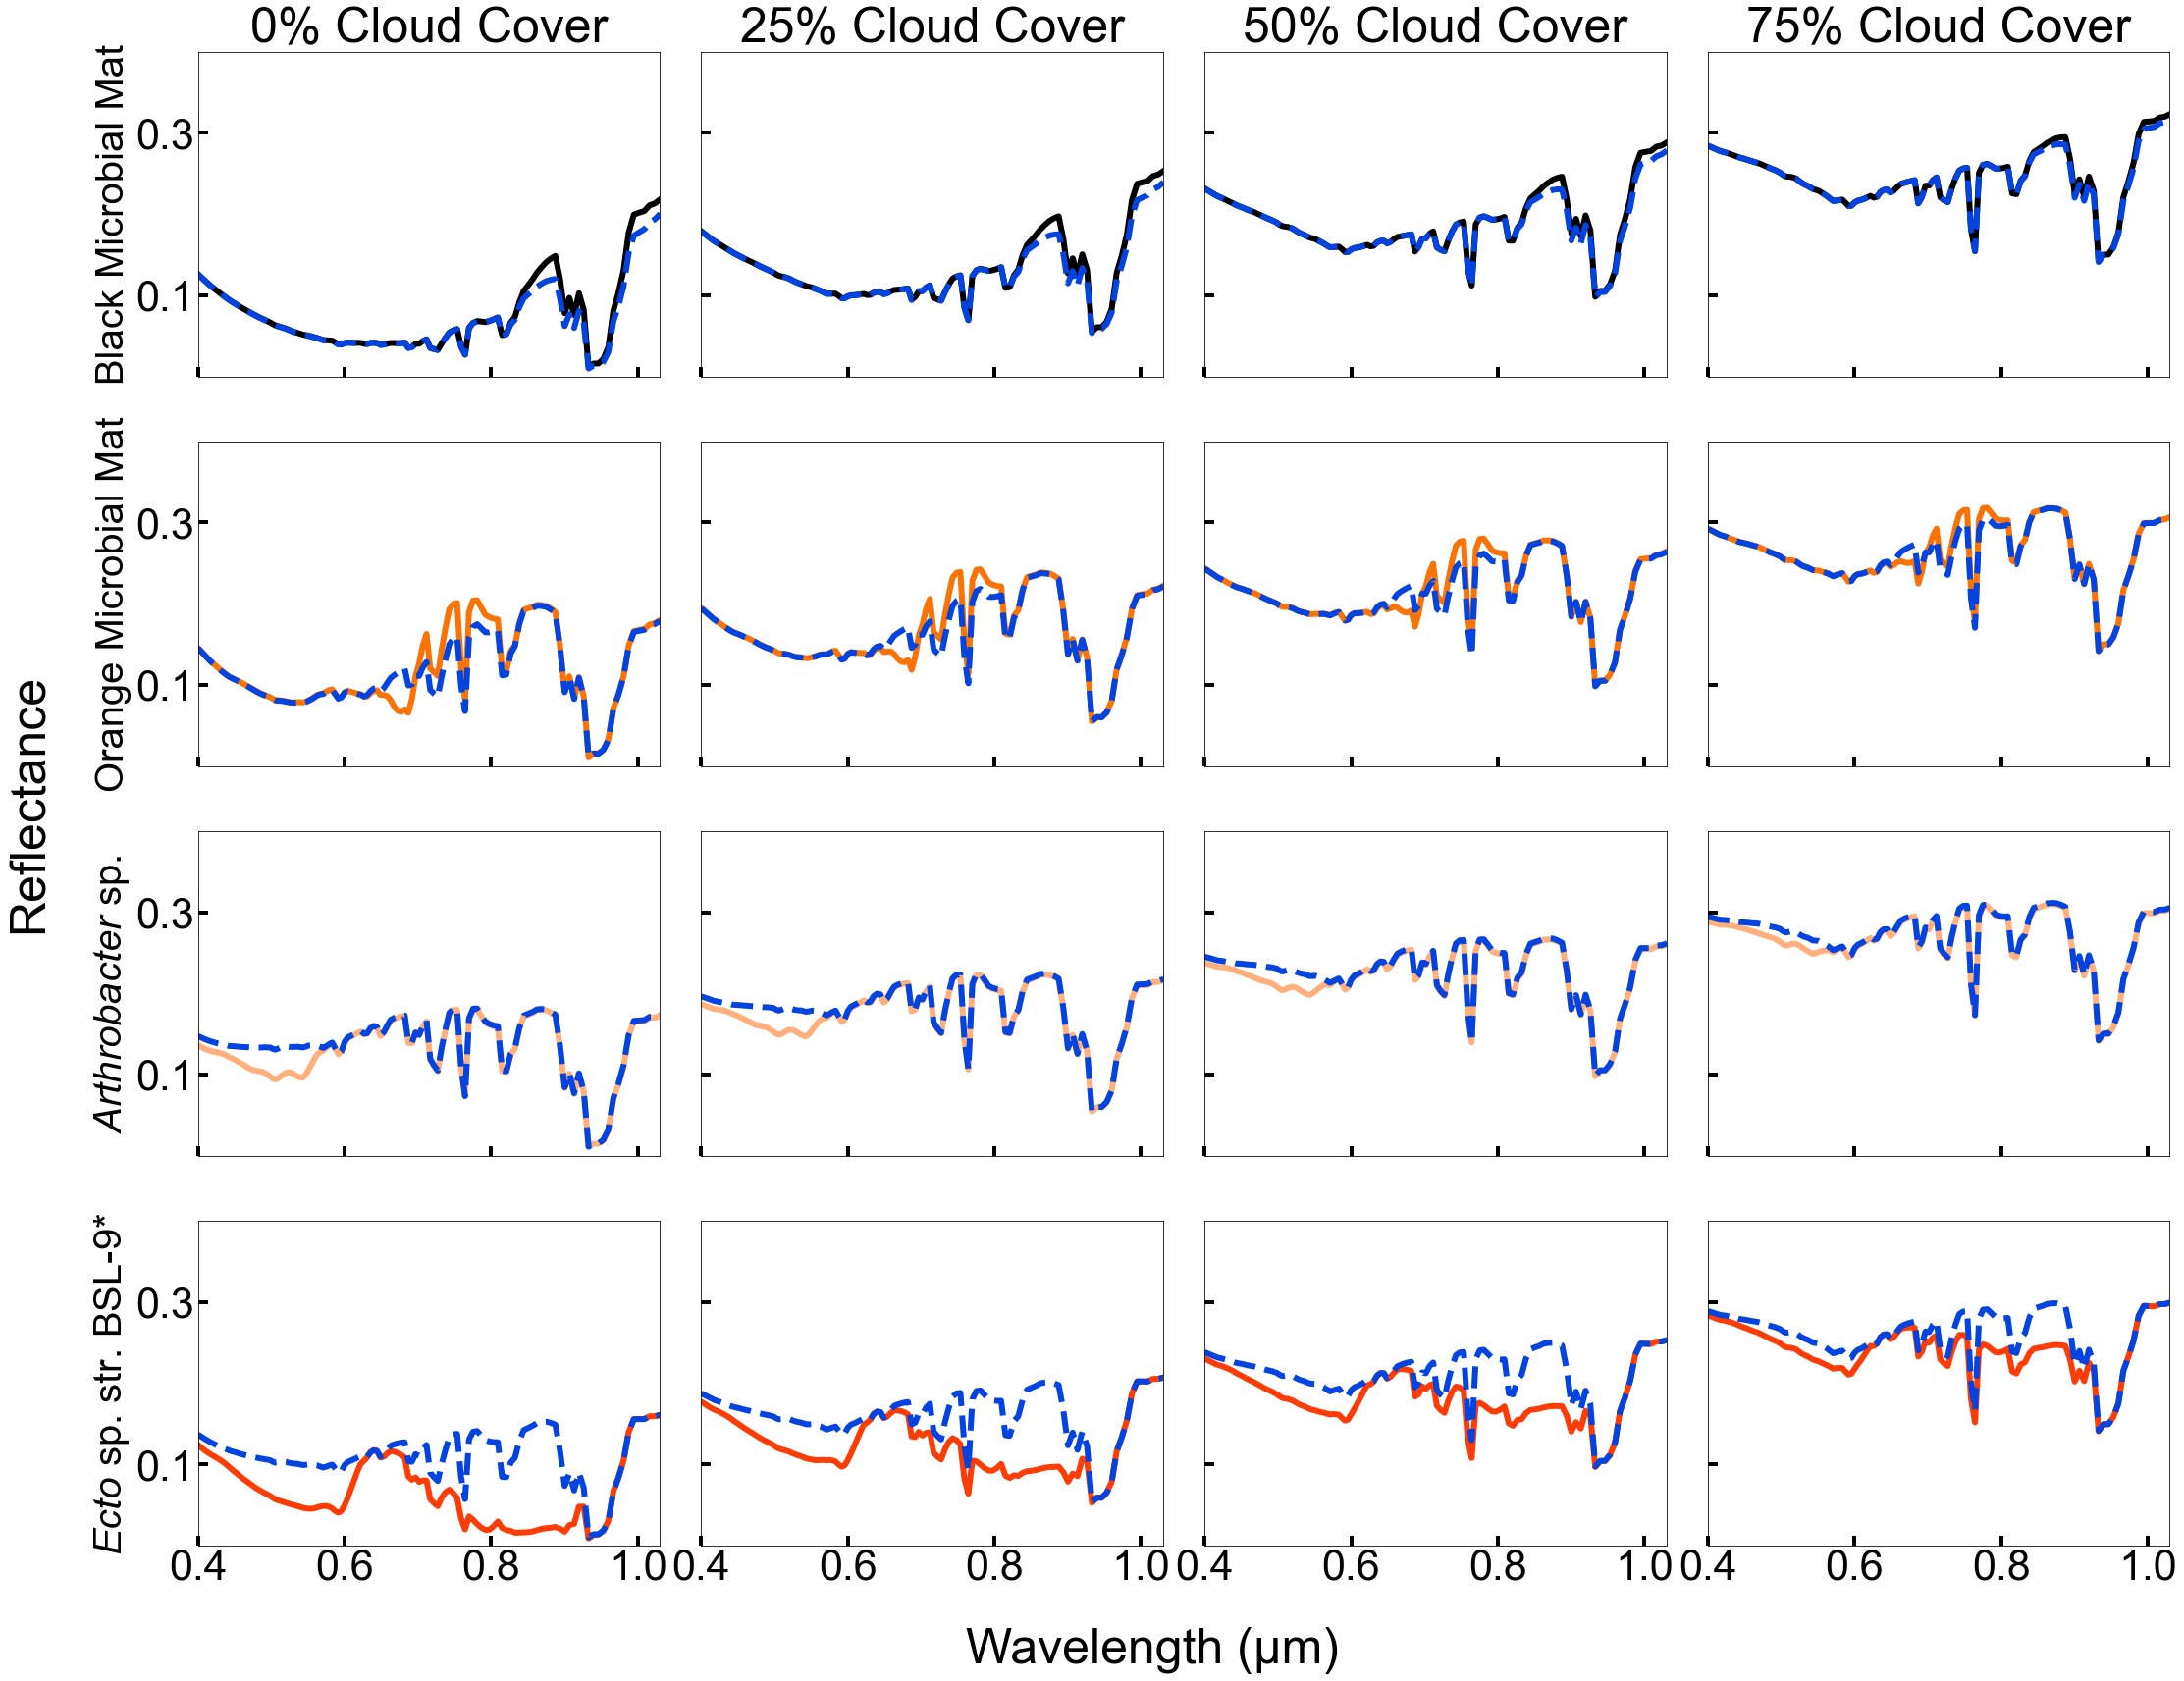

In [17]:
# All of the above spectra plotted in one MEGA-FIGURE for new scrubbed Arthro spectra


font = {'fontname':'Arial'}
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.it']= 'Arial:italic'
plt.rcParams['mathtext.cal']= 'Arial:italic'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams["mathtext.fontset"] = 'custom'

fig, axs = plt.subplots(4, 4)
fig.set_size_inches(36, 28)
fig.set_facecolor('white')
#fig.suptitle('', fontsize=50, y=0.98, **font)
plt.subplots_adjust(hspace=0.2, wspace=0.09)
fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 50, x=0.5, y=0.06, **font)
fig.supylabel('Reflectance', fontsize = 50, x=0.05, y=0.5, **font)
xlim=(0.4,1.030)
ylim=(0,0.4)
plt.setp(axs, xlim=xlim, ylim=ylim)
legparams = font_manager.FontProperties(family = 'Arial', size = 43)

# Black Microbial Mat
    
# 0% Cloud Cover 
axs[0,0].plot(downspec(clearrad['black_clearSky_mon_toa.rad'][1], clearrad['black_clearSky_mon_toa.rad'][0])[0],\
              downspec(clearrad['black_clearSky_mon_toa.rad'][1], clearrad['black_clearSky_mon_toa.rad'][0])[1],\
              'xkcd:black',linewidth=6, label = 'Biotic')
axs[0,0].plot(downspec(clearrad['black_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['black_clearSky_scrubbed_mon_toa.rad'][0])[0], \
              downspec(clearrad['black_clearSky_scrubbed_mon_toa.rad'][1],\
                       clearrad['black_clearSky_scrubbed_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[0,0].set_title('0% Cloud Cover', fontsize = 50, **font)
axs[0,0].set_ylabel('Black Microbial Mat', fontsize = 40, **font)
axs[0,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[0,0].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[0,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[0,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,0].xaxis.set_ticklabels([])
#axs[0,0].legend(fontsize = 43, loc = 'upper left', ncol=1, prop = legparams, frameon=False)
    

# 25% Cloud Cover
axs[0,1].plot(downspec(mixedtxt['blackmat_mixed25.txt'][1], mixedtxt['blackmat_mixed25.txt'][0])[0],\
              downspec(mixedtxt['blackmat_mixed25.txt'][1], mixedtxt['blackmat_mixed25.txt'][0])[1],\
              'xkcd:black',linewidth=6, label = 'Biotic spectrum')
axs[0,1].plot(downspec(mixedtxt['blackmat_mixed25_scrubbed.txt'][1], \
                       mixedtxt['blackmat_mixed25_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['blackmat_mixed25_scrubbed.txt'][1],\
                       mixedtxt['blackmat_mixed25_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[0,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[0,1].set_title('25% Cloud Cover', fontsize = 50, **font)
axs[0,1].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[0,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[0,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,1].yaxis.set_ticklabels([])
axs[0,1].xaxis.set_ticklabels([])
#axs[0,1].legend(fontsize = 20, loc = 'upper left', ncol=1, prop = legparams, frameon=False)

# 50% Cloud Cover
axs[0,2].plot(downspec(mixedtxt['blackmat_mixed50.txt'][1], mixedtxt['blackmat_mixed50.txt'][0])[0],\
              downspec(mixedtxt['blackmat_mixed50.txt'][1], mixedtxt['blackmat_mixed50.txt'][0])[1],\
              'xkcd:black',linewidth=6, label = 'Biotic spectrum')
axs[0,2].plot(downspec(mixedtxt['blackmat_mixed50_scrubbed.txt'][1], \
                       mixedtxt['blackmat_mixed50_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['blackmat_mixed50_scrubbed.txt'][1],\
                       mixedtxt['blackmat_mixed50_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[0,2].set_title('50% Cloud Cover', fontsize = 50, **font)
axs[0,2].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[0,2].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[0,2].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[0,2].xaxis.set_ticklabels([])
axs[0,2].yaxis.set_ticklabels([])
for tick in axs[0,2].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,2].get_yticklabels():
    tick.set_fontname("Arial")
#axs[0,2].legend(fontsize = 20, loc = 'upper left', ncol=1, prop = legparams, frameon=False)

# 75% Cloud Cover
axs[0,3].plot(downspec(mixedtxt['blackmat_mixed75.txt'][1], mixedtxt['blackmat_mixed75.txt'][0])[0],\
              downspec(mixedtxt['blackmat_mixed75.txt'][1], mixedtxt['blackmat_mixed75.txt'][0])[1],\
              'xkcd:black',linewidth=6, label = 'Biotic spectrum')
axs[0,3].plot(downspec(mixedtxt['blackmat_mixed75_scrubbed.txt'][1], \
                       mixedtxt['blackmat_mixed75_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['blackmat_mixed75_scrubbed.txt'][1],\
                       mixedtxt['blackmat_mixed75_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[0,3].set_title('75% Cloud Cover', fontsize = 50, **font)
axs[0,3].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[0,3].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[0,3].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[0,3].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,3].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,3].yaxis.set_ticklabels([])
axs[0,3].xaxis.set_ticklabels([])
#axs[0,3].legend(fontsize = 20, loc = 'lower left', ncol=1, prop = legparams, frameon=False)
    
# Orange Microbial Mat
    
# 0% Cloud Cover 
axs[1,0].plot(downspec(clearrad['orangemat_clearSky_mon_toa.rad'][1], clearrad['orangemat_clearSky_mon_toa.rad'][0])[0],\
              downspec(clearrad['orangemat_clearSky_mon_toa.rad'][1], clearrad['orangemat_clearSky_mon_toa.rad'][0])[1],\
              'xkcd:orange',linewidth=6, label = 'Biotic')
axs[1,0].plot(downspec(clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][0])[0], \
              downspec(clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][1],\
                       clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[1,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[1,0].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[1,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[1,0].set_ylabel('Orange Microbial Mat', fontsize = 40, **font)
for tick in axs[1,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,0].xaxis.set_ticklabels([])
#axs[1,0].legend(fontsize = 43, loc = 'upper left', ncol=1, prop = legparams, frameon=False)
    

# 25% Cloud Cover
axs[1,1].plot(downspec(mixedtxt['orangemat_mixed25.txt'][1], mixedtxt['orangemat_mixed25.txt'][0])[0],\
              downspec(mixedtxt['orangemat_mixed25.txt'][1], mixedtxt['orangemat_mixed25.txt'][0])[1],\
              'xkcd:orange',linewidth=6, label = 'Biotic spectrum')
axs[1,1].plot(downspec(mixedtxt['orangemat_mixed25_scrubbed.txt'][1], \
                       mixedtxt['orangemat_mixed25_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['orangemat_mixed25_scrubbed.txt'][1],\
                       mixedtxt['orangemat_mixed25_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[1,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[1,1].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[1,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[1,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,1].yaxis.set_ticklabels([])
axs[1,1].xaxis.set_ticklabels([])
#axs[1,1].legend(fontsize = 20, loc = 'upper left', ncol=1, prop = legparams, frameon=False)

# 50% Cloud Cover
axs[1,2].plot(downspec(mixedtxt['orangemat_mixed50.txt'][1], mixedtxt['orangemat_mixed50.txt'][0])[0],\
              downspec(mixedtxt['orangemat_mixed50.txt'][1], mixedtxt['orangemat_mixed50.txt'][0])[1],\
              'xkcd:orange',linewidth=6, label = 'Biotic spectrum')
axs[1,2].plot(downspec(mixedtxt['orangemat_mixed50_scrubbed.txt'][1], \
                       mixedtxt['orangemat_mixed50_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['orangemat_mixed50_scrubbed.txt'][1],\
                       mixedtxt['orangemat_mixed50_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[1,2].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[1,2].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[1,2].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[1,2].xaxis.set_ticklabels([])
axs[1,2].yaxis.set_ticklabels([])
for tick in axs[1,2].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,2].get_yticklabels():
    tick.set_fontname("Arial")
#axs[1,2].legend(fontsize = 20, loc = 'lower left', ncol=1, prop = legparams, frameon=False)

# 75% Cloud Cover
axs[1,3].plot(downspec(mixedtxt['orangemat_mixed75.txt'][1], mixedtxt['orangemat_mixed75.txt'][0])[0],\
              downspec(mixedtxt['orangemat_mixed75.txt'][1], mixedtxt['orangemat_mixed75.txt'][0])[1],\
              'xkcd:orange',linewidth=6, label = 'Biotic spectrum')
axs[1,3].plot(downspec(mixedtxt['orangemat_mixed75_scrubbed.txt'][1], \
                       mixedtxt['orangemat_mixed75_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['orangemat_mixed75_scrubbed.txt'][1],\
                       mixedtxt['orangemat_mixed75_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[1,3].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[1,3].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[1,3].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[1,3].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,3].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,3].yaxis.set_ticklabels([])
axs[1,3].xaxis.set_ticklabels([])
#axs[1,3].legend(fontsize = 20, loc = 'lower left', ncol=1, prop = legparams, frameon=False)
    
    
# Arthrobacter sp.
    
# 0% Cloud Cover 
axs[2,0].plot(downspec(clearrad['Arthro_clearSky_mon_toa.rad'][1], clearrad['Arthro_clearSky_mon_toa.rad'][0])[0],\
              downspec(clearrad['Arthro_clearSky_mon_toa.rad'][1], clearrad['Arthro_clearSky_mon_toa.rad'][0])[1],\
              'xkcd:peach',linewidth=6, label = 'Biotic')
axs[2,0].plot(downspec(clearrad['Arthro_clearSky_scrub_v3_um_toa.rad'][1], \
                       clearrad['Arthro_clearSky_scrub_v3_um_toa.rad'][0])[0], \
              downspec(clearrad['Arthro_clearSky_scrub_v3_um_toa.rad'][1],\
                       clearrad['Arthro_clearSky_scrub_v3_um_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[2,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[2,0].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[2,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[2,0].set_ylabel('$\it{Arthrobacter}$ sp.', fontsize = 40, **font)
for tick in axs[2,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[2,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[2,0].xaxis.set_ticklabels([])
#axs[2,0].legend(fontsize = 43, loc = 'upper left', ncol=1, prop = legparams, frameon=False)
    

# 25% Cloud Cover
axs[2,1].plot(downspec(mixedtxt['Arthro_mixed25.txt'][1], mixedtxt['Arthro_mixed25.txt'][0])[0],\
              downspec(mixedtxt['Arthro_mixed25.txt'][1], mixedtxt['Arthro_mixed25.txt'][0])[1],\
              'xkcd:peach',linewidth=6, label = 'Biotic spectrum')
axs[2,1].plot(downspec(mixedtxt['Arthro_new_mixed25_scrubbed.txt'][1], \
                       mixedtxt['Arthro_new_mixed25_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['Arthro_new_mixed25_scrubbed.txt'][1],\
                       mixedtxt['Arthro_new_mixed25_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[2,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[2,1].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[2,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[2,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[2,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[2,1].yaxis.set_ticklabels([])
axs[2,1].xaxis.set_ticklabels([])
#axs[2,1].legend(fontsize = 20, loc = 'upper left', ncol=1, prop = legparams, frameon=False)

# 50% Cloud Cover
axs[2,2].plot(downspec(mixedtxt['Arthro_mixed50.txt'][1], mixedtxt['Arthro_mixed50.txt'][0])[0],\
              downspec(mixedtxt['Arthro_mixed50.txt'][1], mixedtxt['Arthro_mixed50.txt'][0])[1],\
              'xkcd:peach',linewidth=6, label = 'Biotic spectrum')
axs[2,2].plot(downspec(mixedtxt['Arthro_new_mixed50_scrubbed.txt'][1], \
                       mixedtxt['Arthro_new_mixed50_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['Arthro_new_mixed50_scrubbed.txt'][1],\
                       mixedtxt['Arthro_new_mixed50_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[2,2].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[2,2].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[2,2].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[2,2].xaxis.set_ticklabels([])
axs[2,2].yaxis.set_ticklabels([])
for tick in axs[2,2].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[2,2].get_yticklabels():
    tick.set_fontname("Arial")
#axs[2,2].legend(fontsize = 20, loc = 'lower left', ncol=1, prop = legparams, frameon=False)

# 75% Cloud Cover
axs[2,3].plot(downspec(mixedtxt['Arthro_mixed75.txt'][1], mixedtxt['Arthro_mixed75.txt'][0])[0],\
              downspec(mixedtxt['Arthro_mixed75.txt'][1], mixedtxt['Arthro_mixed75.txt'][0])[1],\
              'xkcd:peach',linewidth=6, label = 'Biotic spectrum')
axs[2,3].plot(downspec(mixedtxt['Arthro_new_mixed75_scrubbed.txt'][1], \
                       mixedtxt['Arthro_new_mixed75_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['Arthro_new_mixed75_scrubbed.txt'][1],\
                       mixedtxt['Arthro_new_mixed75_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[2,3].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[2,3].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[2,3].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[2,3].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[2,3].get_yticklabels():
    tick.set_fontname("Arial")
axs[2,3].yaxis.set_ticklabels([])
axs[2,3].xaxis.set_ticklabels([])
#axs[2,3].legend(fontsize = 20, loc = 'lower left', ncol=1, prop = legparams, frameon=False)   
    
    
# Ectothiorhodospira sp. str. BSL-9
    
# 0% Cloud Cover 
axs[3,0].plot(downspec(clearrad['Ecto_clearSky_new_toa.rad'][1], clearrad['Ecto_clearSky_new_toa.rad'][0])[0],\
              downspec(clearrad['Ecto_clearSky_new_toa.rad'][1], clearrad['Ecto_clearSky_new_toa.rad'][0])[1],\
              'xkcd:red orange',linewidth=6, label = 'Biotic')
axs[3,0].plot(downspec(clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][0])[0], \
              downspec(clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][1],\
                       clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[3,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[3,0].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[3,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[3,0].set_ylabel('$\it{Ecto}$ sp. str. BSL-9*', fontsize = 40, **font)
for tick in axs[3,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[3,0].get_yticklabels():
    tick.set_fontname("Arial")
#axs[3,0].legend(fontsize = 43, loc = 'upper left', ncol=1, prop = legparams, frameon=False)
    

# 25% Cloud Cover
axs[3,1].plot(downspec(mixedtxt['Ectoth_mixed25.txt'][1], mixedtxt['Ectoth_mixed25.txt'][0])[0],\
              downspec(mixedtxt['Ectoth_mixed25.txt'][1], mixedtxt['Ectoth_mixed25.txt'][0])[1],\
              'xkcd:red orange',linewidth=6, label = 'Biotic spectrum')
axs[3,1].plot(downspec(mixedtxt['Ectoth_mixed25_scrubbed.txt'][1], \
                       mixedtxt['Ectoth_mixed25_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['Ectoth_mixed25_scrubbed.txt'][1],\
                       mixedtxt['Ectoth_mixed25_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[3,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[3,1].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[3,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[3,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[3,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[3,1].yaxis.set_ticklabels([])
#axs[3,1].legend(fontsize = 20, loc = 'upper left', ncol=1, prop = legparams, frameon=False)

# 50% Cloud Cover
axs[3,2].plot(downspec(mixedtxt['Ectoth_mixed50.txt'][1], mixedtxt['Ectoth_mixed50.txt'][0])[0],\
              downspec(mixedtxt['Ectoth_mixed50.txt'][1], mixedtxt['Ectoth_mixed50.txt'][0])[1],\
              'xkcd:red orange',linewidth=6, label = 'Biotic spectrum')
axs[3,2].plot(downspec(mixedtxt['Ectoth_mixed50_scrubbed.txt'][1], \
                       mixedtxt['Ectoth_mixed50_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['Ectoth_mixed50_scrubbed.txt'][1],\
                       mixedtxt['Ectoth_mixed50_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[3,2].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[3,2].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[3,2].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[3,2].yaxis.set_ticklabels([])
for tick in axs[3,2].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[3,2].get_yticklabels():
    tick.set_fontname("Arial")
#axs[3,2].legend(fontsize = 20, loc = 'upper left', ncol=1, prop = legparams, frameon=False)

# 75% Cloud Cover
axs[3,3].plot(downspec(mixedtxt['Ectoth_mixed75.txt'][1], mixedtxt['Ectoth_mixed75.txt'][0])[0],\
              downspec(mixedtxt['Ectoth_mixed75.txt'][1], mixedtxt['Ectoth_mixed75.txt'][0])[1],\
              'xkcd:red orange',linewidth=6, label = 'Biotic spectrum')
axs[3,3].plot(downspec(mixedtxt['Ectoth_mixed75_scrubbed.txt'][1], \
                       mixedtxt['Ectoth_mixed75_scrubbed.txt'][0])[0], \
              downspec(mixedtxt['Ectoth_mixed75_scrubbed.txt'][1],\
                       mixedtxt['Ectoth_mixed75_scrubbed.txt'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic spectrum')
axs[3,3].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[3,3].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[3,3].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[3,3].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[3,3].get_yticklabels():
    tick.set_fontname("Arial")
axs[3,3].yaxis.set_ticklabels([])
#axs[3,3].legend(fontsize = 20, loc = 'lower left', ncol=1, prop = legparams, frameon=False) 

plt.savefig('/Users/schuylerraeschroerborges/Downloads/Figure7.4.tif', format='tif')

[Text(0, 0.1, ''), Text(0, 0.30000000000000004, '')]

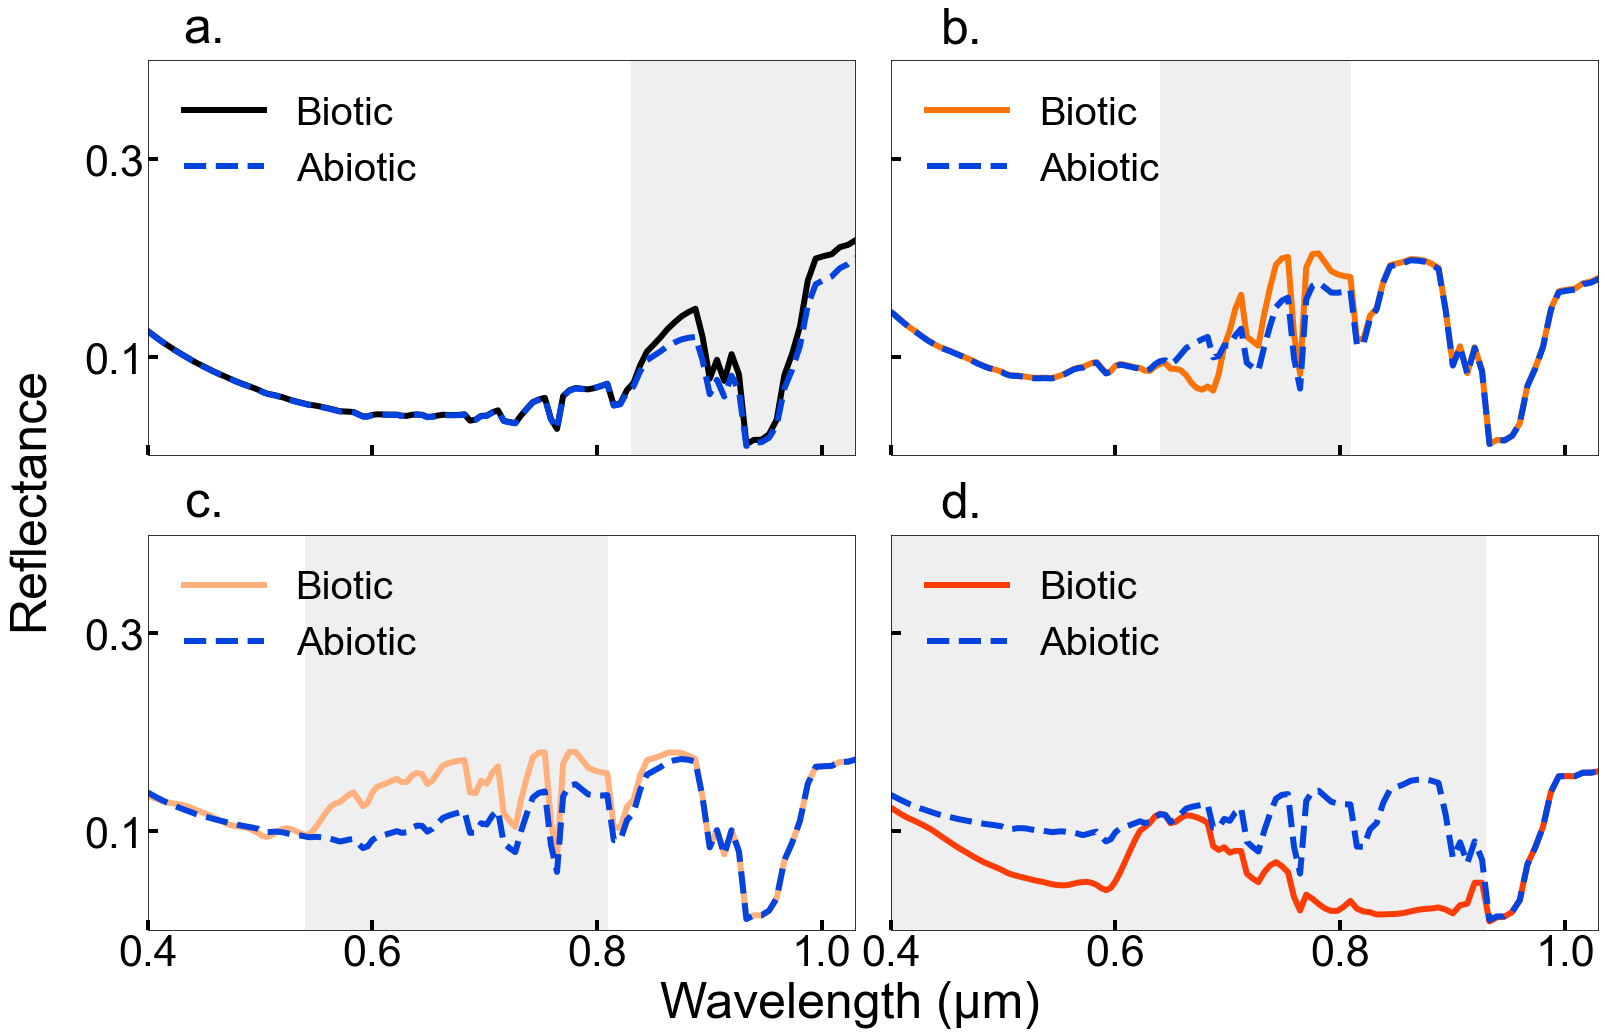

In [52]:
# Mixed cloud spectra bio and abio together at 0% cloud cover for all microbes


font = {'fontname':'Arial'}
    
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(26, 16)
fig.set_facecolor('white')
#fig.suptitle('Top-of-Atmosphere Spectra with Clear Skies', fontsize=50, y=0.98, **font)
plt.subplots_adjust(hspace=0.2, wspace=0.05)
fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 50, x=0.5, y=0.04, **font)
fig.supylabel('Reflectance', fontsize = 50, x=0.05, y=0.5, **font)
xlim=(0.4,1.030)
ylim=(0,0.4)
plt.setp(axs, xlim=xlim, ylim=ylim)
legparams = font_manager.FontProperties(family = 'Arial', size = 40)

# Black
axs[0,0].plot(downspec(clearrad['black_clearSky_mon_toa.rad'][1], clearrad['black_clearSky_mon_toa.rad'][0])[0],\
              downspec(clearrad['black_clearSky_mon_toa.rad'][1], clearrad['black_clearSky_mon_toa.rad'][0])[1],\
              'xkcd:black',linewidth=6, label = 'Biotic')
axs[0,0].plot(downspec(clearrad['black_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['black_clearSky_scrubbed_mon_toa.rad'][0])[0], \
              downspec(clearrad['black_clearSky_scrubbed_mon_toa.rad'][1],\
                       clearrad['black_clearSky_scrubbed_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[0,0].set_title('a.', fontsize = 50, **font, x = 0.08, y = 1.03)
axs[0,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[0,0].axvspan(xmin=0.83, xmax=1.03, facecolor='xkcd:grey', alpha=0.15)
axs[0,0].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[0,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[0,0].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[0,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,0].xaxis.set_ticklabels([])

# Orange
axs[0,1].plot(downspec(clearrad['orangemat_clearSky_mon_toa.rad'][1], \
                       clearrad['orangemat_clearSky_mon_toa.rad'][0])[0], \
              downspec(clearrad['orangemat_clearSky_mon_toa.rad'][1], \
                       clearrad['orangemat_clearSky_mon_toa.rad'][0])[1],\
              'xkcd:orange',linewidth=6, label = 'Biotic')
axs[0,1].plot(downspec(clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][0])[0], \
              downspec(clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[0,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[0,1].set_title('b.', fontsize = 50, **font, x = 0.1, y = 1.03)
axs[0,1].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[0,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[0,1].axvspan(xmin=0.64, xmax=0.81, facecolor='xkcd:grey', alpha=0.15)
axs[0,1].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[0,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,1].yaxis.set_ticklabels([])
axs[0,1].xaxis.set_ticklabels([])

# Arthro
axs[1,0].plot(downspec(clearrad['Arthro_clearSky_mon_toa.rad'][1], clearrad['Arthro_clearSky_mon_toa.rad'][0])[0], \
              downspec(clearrad['Arthro_clearSky_mon_toa.rad'][1], clearrad['Arthro_clearSky_mon_toa.rad'][0])[1],\
              'xkcd:peach',linewidth=6, label = 'Biotic')
axs[1,0].plot(downspec(clearrad['Arthro_clearSky_scrubbed_updated_mon_toa.rad'][1], \
                       clearrad['Arthro_clearSky_scrubbed_updated_mon_toa.rad'][0])[0], \
              downspec(clearrad['Arthro_clearSky_scrubbed_updated_mon_toa.rad'][1], \
                       clearrad['Arthro_clearSky_scrubbed_updated_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[1,0].set_title('c.', fontsize = 50, **font, x = 0.08, y = 1.03)
axs[1,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[1,0].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[1,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[1,0].axvspan(xmin=0.54, xmax=0.81, facecolor='xkcd:grey', alpha=0.15)
axs[1,0].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[1,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,0].get_yticklabels():
    tick.set_fontname("Arial")

# Ecto
axs[1,1].plot(downspec(clearrad['Ecto_clearSky_new_toa.rad'][1], clearrad['Ecto_clearSky_new_toa.rad'][0])[0], \
              downspec(clearrad['Ecto_clearSky_new_toa.rad'][1], clearrad['Ecto_clearSky_new_toa.rad'][0])[1],\
              'xkcd:red orange',linewidth=6, label = 'Biotic')
axs[1,1].plot(downspec(clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][0])[0], \
              downspec(clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[1,1].set_title('d.', fontsize = 50, **font, x = 0.1, y = 1.03)
axs[1,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[1,1].axvspan(xmin=0.4, xmax=0.93, facecolor='xkcd:grey', alpha=0.15)
axs[1,1].set_yticks(np.arange(0.1, 0.5, step=0.2))
axs[1,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[1,1].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[1,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,1].yaxis.set_ticklabels([])

[Text(0, 0.1, ''), Text(0, 0.2, '')]

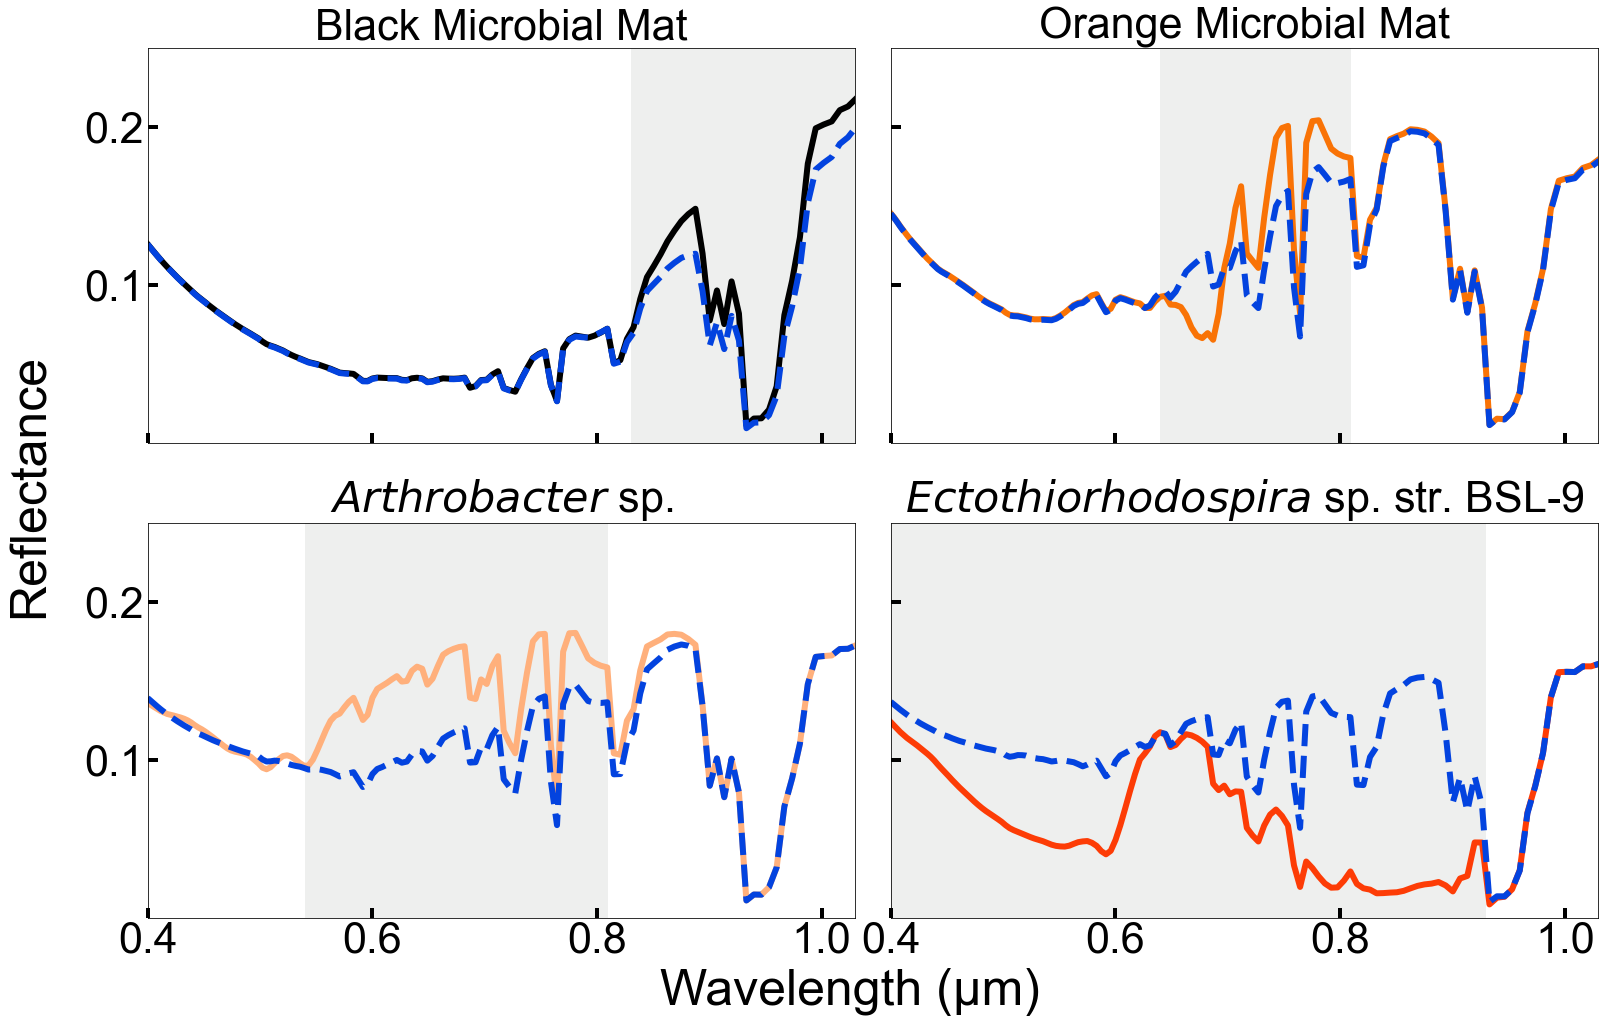

In [61]:
# Mixed cloud spectra bio and abio together at 0% cloud cover for all microbes


font = {'fontname':'Arial'}
    
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(26, 16)
fig.set_facecolor('white')
#fig.suptitle('Top-of-Atmosphere Spectra with Clear Skies', fontsize=50, y=0.98, **font)
plt.subplots_adjust(hspace=0.2, wspace=0.05)
fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 50, x=0.5, y=0.04, **font)
fig.supylabel('Reflectance', fontsize = 50, x=0.05, y=0.5, **font)
xlim=(0.4,1.030)
ylim=(0,0.25)
plt.setp(axs, xlim=xlim, ylim=ylim)
legparams = font_manager.FontProperties(family = 'Arial', size = 40)

# Black
axs[0,0].plot(downspec(clearrad['black_clearSky_mon_toa.rad'][1], clearrad['black_clearSky_mon_toa.rad'][0])[0],\
              downspec(clearrad['black_clearSky_mon_toa.rad'][1], clearrad['black_clearSky_mon_toa.rad'][0])[1],\
              'xkcd:black',linewidth=6, label = 'Biotic')
axs[0,0].plot(downspec(clearrad['black_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['black_clearSky_scrubbed_mon_toa.rad'][0])[0], \
              downspec(clearrad['black_clearSky_scrubbed_mon_toa.rad'][1],\
                       clearrad['black_clearSky_scrubbed_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[0,0].set_title('Black Microbial Mat', fontsize = 43, **font)
axs[0,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[0,0].axvspan(xmin=0.83, xmax=1.03, facecolor='xkcd:grey', alpha=0.15)
axs[0,0].set_yticks(np.arange(0.1, 0.25, step=0.1))
axs[0,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
#axs[0,0].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[0,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,0].xaxis.set_ticklabels([])

# Orange
axs[0,1].plot(downspec(clearrad['orangemat_clearSky_mon_toa.rad'][1], \
                       clearrad['orangemat_clearSky_mon_toa.rad'][0])[0], \
              downspec(clearrad['orangemat_clearSky_mon_toa.rad'][1], \
                       clearrad['orangemat_clearSky_mon_toa.rad'][0])[1],\
              'xkcd:orange',linewidth=6, label = 'Biotic')
axs[0,1].plot(downspec(clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][0])[0], \
              downspec(clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[0,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[0,1].set_title('Orange Microbial Mat', fontsize = 43, **font)
axs[0,1].set_yticks(np.arange(0.1, 0.25, step=0.1))
axs[0,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[0,1].axvspan(xmin=0.64, xmax=0.81, facecolor='xkcd:grey', alpha=0.15)
#axs[0,1].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[0,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,1].yaxis.set_ticklabels([])
axs[0,1].xaxis.set_ticklabels([])

# Arthro
axs[1,0].plot(downspec(clearrad['Arthro_clearSky_mon_toa.rad'][1], clearrad['Arthro_clearSky_mon_toa.rad'][0])[0], \
              downspec(clearrad['Arthro_clearSky_mon_toa.rad'][1], clearrad['Arthro_clearSky_mon_toa.rad'][0])[1],\
              'xkcd:peach',linewidth=6, label = 'Biotic')
axs[1,0].plot(downspec(clearrad['Arthro_clearSky_scrubbed_updated_mon_toa.rad'][1], \
                       clearrad['Arthro_clearSky_scrubbed_updated_mon_toa.rad'][0])[0], \
              downspec(clearrad['Arthro_clearSky_scrubbed_updated_mon_toa.rad'][1], \
                       clearrad['Arthro_clearSky_scrubbed_updated_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[1,0].set_title('$\it{Arthrobacter}$ sp.', fontsize = 43, **font)
axs[1,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[1,0].set_yticks(np.arange(0.1, 0.25, step=0.1))
axs[1,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[1,0].axvspan(xmin=0.54, xmax=0.81, facecolor='xkcd:grey', alpha=0.15)
#axs[1,0].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[1,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,0].get_yticklabels():
    tick.set_fontname("Arial")

# Ecto
axs[1,1].plot(downspec(clearrad['Ecto_clearSky_new_toa.rad'][1], clearrad['Ecto_clearSky_new_toa.rad'][0])[0], \
              downspec(clearrad['Ecto_clearSky_new_toa.rad'][1], clearrad['Ecto_clearSky_new_toa.rad'][0])[1],\
              'xkcd:red orange',linewidth=6, label = 'Biotic')
axs[1,1].plot(downspec(clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][0])[0], \
              downspec(clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[1,1].set_title('$\it{Ectothiorhodospira}$ sp. str. BSL-9', fontsize = 43, **font)
axs[1,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[1,1].axvspan(xmin=0.4, xmax=0.93, facecolor='xkcd:grey', alpha=0.15)
axs[1,1].set_yticks(np.arange(0.1, 0.25, step=0.1))
axs[1,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
#axs[1,1].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[1,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,1].yaxis.set_ticklabels([])

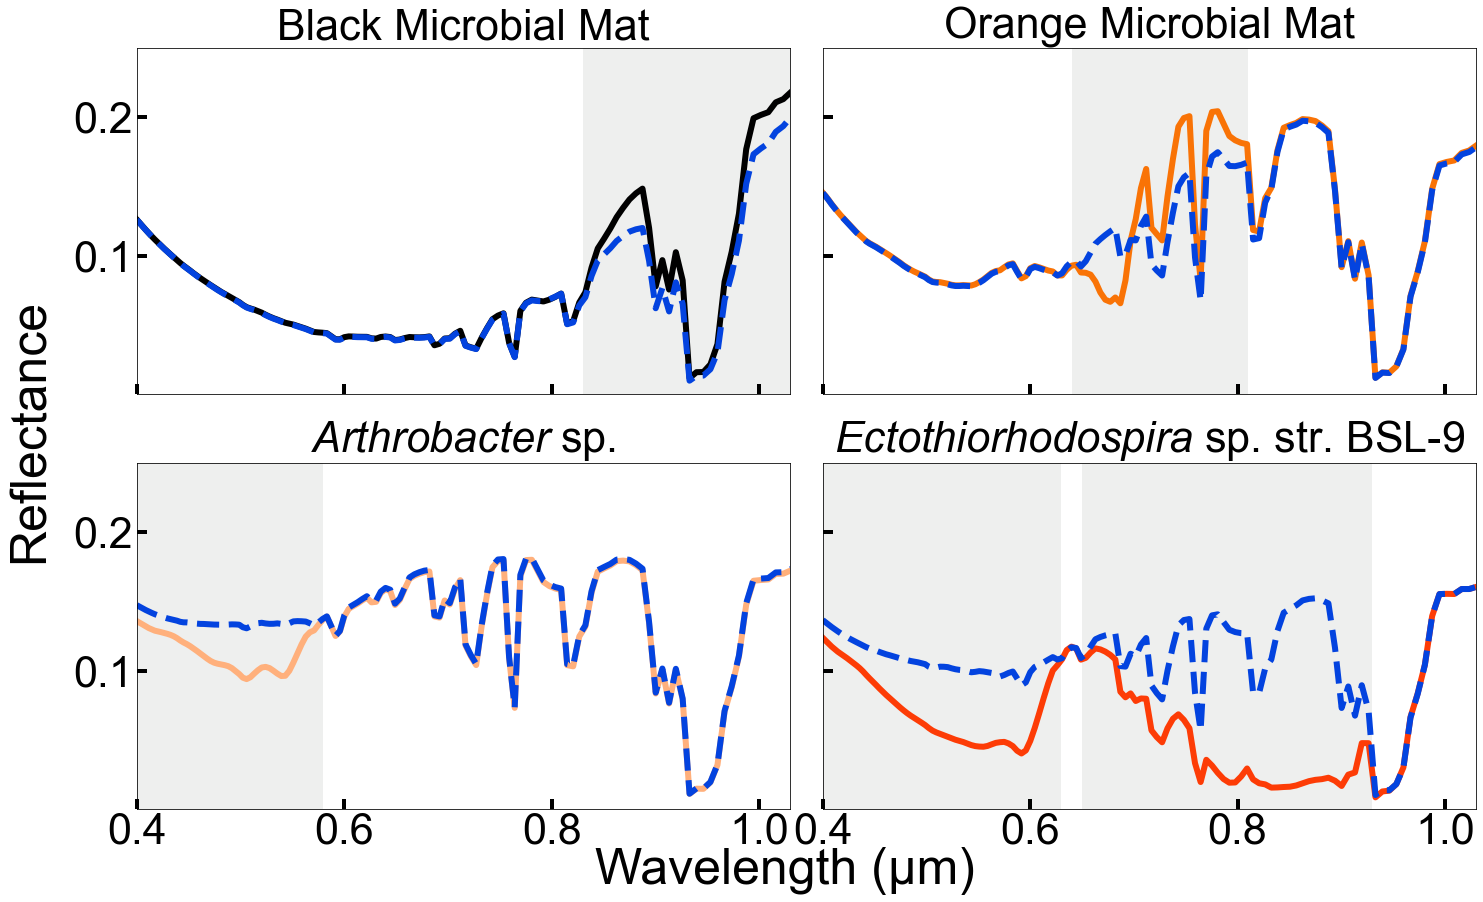

In [12]:
# Mixed cloud spectra bio and abio together at 0% cloud cover for all microbes


font = {'fontname':'Arial'}
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.it']= 'Arial:italic'
plt.rcParams['mathtext.cal']= 'Arial:italic'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams["mathtext.fontset"] = 'custom'
    
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(25, 15)
fig.set_facecolor('white')
#fig.suptitle('Top-of-Atmosphere Spectra with Clear Skies', fontsize=50, y=0.98, **font)
plt.subplots_adjust(hspace=0.2, wspace=0.05)
fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 50, x=0.5, y=0.04, **font)
fig.supylabel('Reflectance', fontsize = 50, x=0.05, y=0.5, **font)
xlim=(0.4,1.030)
ylim=(0,0.25)
plt.setp(axs, xlim=xlim, ylim=ylim)
legparams = font_manager.FontProperties(family = 'Arial', size = 40)

# Black
axs[0,0].plot(downspec(clearrad['black_clearSky_mon_toa.rad'][1], clearrad['black_clearSky_mon_toa.rad'][0])[0],\
              downspec(clearrad['black_clearSky_mon_toa.rad'][1], clearrad['black_clearSky_mon_toa.rad'][0])[1],\
              'xkcd:black',linewidth=6, label = 'Biotic')
axs[0,0].plot(downspec(clearrad['black_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['black_clearSky_scrubbed_mon_toa.rad'][0])[0], \
              downspec(clearrad['black_clearSky_scrubbed_mon_toa.rad'][1],\
                       clearrad['black_clearSky_scrubbed_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[0,0].set_title('Black Microbial Mat', fontsize = 43, **font)
axs[0,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[0,0].axvspan(xmin=0.83, xmax=1.03, facecolor='xkcd:grey', alpha=0.15)
axs[0,0].set_yticks(np.arange(0.1, 0.25, step=0.1))
axs[0,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
#axs[0,0].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[0,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,0].xaxis.set_ticklabels([])

# Orange
axs[0,1].plot(downspec(clearrad['orangemat_clearSky_mon_toa.rad'][1], \
                       clearrad['orangemat_clearSky_mon_toa.rad'][0])[0], \
              downspec(clearrad['orangemat_clearSky_mon_toa.rad'][1], \
                       clearrad['orangemat_clearSky_mon_toa.rad'][0])[1],\
              'xkcd:orange',linewidth=6, label = 'Biotic')
axs[0,1].plot(downspec(clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][0])[0], \
              downspec(clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['orangemat_clearSky_scrubbed_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[0,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[0,1].set_title('Orange Microbial Mat', fontsize = 43, **font)
axs[0,1].set_yticks(np.arange(0.1, 0.25, step=0.1))
axs[0,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[0,1].axvspan(xmin=0.64, xmax=0.81, facecolor='xkcd:grey', alpha=0.15)
#axs[0,1].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[0,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,1].yaxis.set_ticklabels([])
axs[0,1].xaxis.set_ticklabels([])

# Arthro
axs[1,0].plot(downspec(clearrad['Arthro_clearSky_mon_toa.rad'][1], clearrad['Arthro_clearSky_mon_toa.rad'][0])[0], \
              downspec(clearrad['Arthro_clearSky_mon_toa.rad'][1], clearrad['Arthro_clearSky_mon_toa.rad'][0])[1],\
              'xkcd:peach',linewidth=6, label = 'Biotic')
axs[1,0].plot(downspec(clearrad['Arthro_clearSky_scrub_v3_um_toa.rad'][1], \
                       clearrad['Arthro_clearSky_scrub_v3_um_toa.rad'][0])[0], \
              downspec(clearrad['Arthro_clearSky_scrub_v3_um_toa.rad'][1], \
                       clearrad['Arthro_clearSky_scrub_v3_um_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[1,0].set_title('$\it{Arthrobacter}$ sp.', fontsize = 43, **font)
axs[1,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[1,0].set_yticks(np.arange(0.1, 0.25, step=0.1))
axs[1,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
axs[1,0].axvspan(xmin=0.35, xmax=0.58, facecolor='xkcd:grey', alpha=0.15)
#axs[1,0].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[1,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,0].get_yticklabels():
    tick.set_fontname("Arial")

# Ecto
axs[1,1].plot(downspec(clearrad['Ecto_clearSky_new_toa.rad'][1], clearrad['Ecto_clearSky_new_toa.rad'][0])[0], \
              downspec(clearrad['Ecto_clearSky_new_toa.rad'][1], clearrad['Ecto_clearSky_new_toa.rad'][0])[1],\
              'xkcd:red orange',linewidth=6, label = 'Biotic')
axs[1,1].plot(downspec(clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][0])[0], \
              downspec(clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][1], \
                       clearrad['Ectoth_clearSky_scrubbed_mon_toa.rad'][0])[1],\
              'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
axs[1,1].set_title('$\it{Ectothiorhodospira}$ sp. str. BSL-9', fontsize = 43, **font)
axs[1,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[1,1].axvspan(xmin=0.4, xmax=0.63, facecolor='xkcd:grey', alpha=0.15)
axs[1,1].axvspan(xmin=0.65, xmax=0.93, facecolor='xkcd:grey', alpha=0.15)
axs[1,1].set_yticks(np.arange(0.1, 0.25, step=0.1))
axs[1,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
#axs[1,1].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[1,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,1].yaxis.set_ticklabels([])

plt.savefig('/Users/schuylerraeschroerborges/Downloads/Figure5_no_annotations3.tif', format='tif')

